# PUJAR DADES A COLAB

In [2]:

import argparse
import torch
from torch import optim
from torchvision import transforms
#from load_data import get_dataloader
#from model import RecognitionModel
#from loss import RecognitionCriterion
#import trainer
import os
import os.path as osp
from google.colab import drive

root_path = 'gdrive/My Drive/Colab Notebooks/'  #change dir to your project folder
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# LLIBRERIES I VARIABLES NECESSARIES

In [0]:
###############################################################################################
# EXECUTAR NOMÉS SI NO DEIXA MONTAR PERQUE QUEDEN DIRECTORIS RESIDUALS DE L'ANTERIOR EXECUCIÓ #
###############################################################################################
import datetime
import shutil
import codecs
import errno
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import random
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import torchvision.datasets.mnist
from torchvision import transforms
from tqdm import tqdm
import cv2 
import tqdm
import matplotlib.pyplot as plt3
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from torchvision.models import vgg16_bn
from torchvision.models import alexnet
BorrarDirectori=False

# fixant la seed
seed = 1

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

np.random.seed(seed)
random.seed(seed)
 
import random 
random.seed(seed)

if BorrarDirectori:
  shutil.rmtree('/content/gdrive')  

rutaData="D:\\DEEPLEARNING\\redsiamesa\\data2\\"
rutaCode="D:\\DEEPLEARNING\\redsiamesa\\"
rutaWeights="D:\\DEEPLEARNING\\redsiamesa\\weights\\"
rutaDataColab="gdrive/My Drive/Colab Notebooks/data2/"
rutaCodeColab="gdrive/My Drive/Colab Notebooks/"
rutaWeightsColab="gdrive/My Drive/Colab Notebooks/weights/"
ampliation=False
best=""
csvest=""
Best=False
EstoyEnColab=1
do_learn = True
basewidth = 224
baseheight = 224
save_frequency = 1 #not used
save_epoch=35
batch_size = 16
lr = 0.00001 # 1e-3  y 5e-4
num_epochs = 50
weight_decay = 0 #  0 y 5*e-4
tipoGD= 1 #1=Adam, 2=SDG
tipoMD="Alexnet" #1=Alexnet, 2=VGGPretrained, 3=VGG
mio=1 
epoch=weightNum=9  
RGBmode="RGB"  #"RGB" # "L" 
InferenceAccuracyShow=True
besthistory=[]
val_losses=[]
train_losses=[]
val_losses_mean=[]
train_losses_mean=[]
val_accuracy_mean=[]
accuracy_mean=[]
epocas=[]

val_losses_epoch=[]
train_losses_epoch=[]
val_accuracy_epoch=[]
accuracy_epoch=[]

# CARREGA DE IMATGES

In [0]:
def get_int(b):
   return int(codecs.encode(b, 'hex'), 16)

def read_image_file2(path):
    if EstoyEnColab==0: 
        filesl= np.genfromtxt('%scfp-dataset\\Protocol\\Pair_list_F.txt'%rutaData,dtype='str')
    else:
        filesl= np.genfromtxt('%scfp-dataset/Protocol/Pair_list_F.txt'%rutaDataColab,dtype='str')
        
    train_datai=[]
    train_labelsi=[]
    for jj in range(0,5000): 
        filei=filesl[jj,1][3:]
        catei=int(filesl[jj,1][15:18])
        if EstoyEnColab==0:
            im = Image.open('%scfp-dataset\\%s'%(rutaData,filei) ).convert(RGBmode) 
        else:
            im = Image.open('%scfp-dataset/%s'%(rutaDataColab,filei)).convert(RGBmode)
        width, height = im.size
        #basewidth = 224
        #baseheight = 224
        if width>=height:
            wpercent = (basewidth/float(im.size[0]))
            hsize = int((float(im.size[1])*float(wpercent)))
            im = im.resize((basewidth,hsize), Image.ANTIALIAS)
            im.save('_0.png') 
            width, height =im.size
            if (baseheight-height)%2==0:
                borderType=cv2.BORDER_CONSTANT
                image = cv2.copyMakeBorder(  cv2.imread('_0.png'),  int((baseheight-height)/2) , int((baseheight-height)/2), 0, 0, borderType)
                im = Image.fromarray(image)  
            else:
                borderType=cv2.BORDER_CONSTANT
                image = cv2.copyMakeBorder(  cv2.imread('_0.png'),  int((baseheight-height)/2-0.5) , int((baseheight-height)/2+0.5), 0, 0, cv2.BORDER_CONSTANT,value=[0, 0, 0])
                im = Image.fromarray(image) 
        else:
            wpercent = (baseheight/float(im.size[1]))
            vsize = int((float(im.size[0])*float(wpercent)))
            im = im.resize((vsize,basewidth), Image.ANTIALIAS)
            im.save('_0.png') 
            width, height =im.size
            if (basewidth-width)%2==0:
                borderType=cv2.BORDER_CONSTANT
                image = cv2.copyMakeBorder(  cv2.imread('_0.png') ,   0, 0, int((basewidth-width)/2) , int((basewidth-width)/2),  cv2.BORDER_CONSTANT, borderType)
                im = Image.fromarray(image) 
            else:
                borderType=cv2.BORDER_CONSTANT
                image = cv2.copyMakeBorder( cv2.imread('_0.png'),  0, 0, int((basewidth-width)/2-0.5) , int((basewidth-width)/2+0.5),  cv2.BORDER_CONSTANT,value=[0, 0, 0])
                im = Image.fromarray(image)         
        im
        if jj%250==0:
            print(jj)
        train_datai.append(image)
        train_labelsi.append(catei)
    np.stack(train_datai, axis=0).shape
    np.stack(train_labelsi, axis=0).shape
    train_datai=np.stack(train_datai, axis=0)
    train_labelsi=np.stack(train_labelsi, axis=0)
    train_datai.shape
    train_labelsi.shape
    
    a=torch.from_numpy(train_datai)
    return a

def read_label_file2(path):
    if EstoyEnColab==0:
        filesl= np.genfromtxt('%scfp-dataset\\Protocol\\Pair_list_F.txt'%rutaData,dtype='str')
    else:
        filesl= np.genfromtxt('%scfp-dataset/Protocol/Pair_list_F.txt'%rutaDataColab,dtype='str')
    train_labelsi=[]
    for jj in range(0,5000): 
        catei=int(filesl[jj,1][15:18])
        train_labelsi.append(catei)
        if jj%250==0:
            print(jj)
    train_labelsi=np.stack(train_labelsi, axis=0)
    b=torch.from_numpy(train_labelsi)
    return b

class BalancedPair(torch.utils.data.Dataset):
   """samples
   """
   urls = [ 
      '','','',''
   ]
   raw_folder = 'raw'
   processed_folder = 'processed'
   training_file = 'training.pt'
   test_file = 'test.pt'
   
   def __init__(self, root, train=True, transform=None, target_transform=None, download=False,vali=False):  #vali es para validation, train =True es para traning, Train=False es para Test
      self.root = os.path.expanduser(root)
      self.transform = transform
      self.target_transform = target_transform
      self.train = train 
       
      if download:
         self.download()
          
      if not self._check_exists():
         raise RuntimeError('Dataset not found.' + ' You can use download=True to download it')   
      if self.train and vali==False:
         self.train_data, self.train_labels = torch.load( os.path.join(self.root, self.processed_folder, self.training_file))
         train_labels_class = []
         train_data_class = []

         for i in range(1,300+1  ):
            indices = torch.squeeze((self.train_labels == i).nonzero())
            train_labels_class.append(torch.index_select(self.train_labels, 0, indices))
            train_data_class.append(torch.index_select(self.train_data, 0, indices)) 
            
         # generate balanced pairs TRAINING
         self.train_data = []
         self.train_labels = [] 
         for i in range(1,  300  ):
            for j in range( 10  ): 
               rnd_cls = random.randint(0, (300-2)  ) 
               if rnd_cls >= i:
                  rnd_cls = rnd_cls + 1 
               rnd_dist = random.randint(0, 100) 
               
               self.train_data.append(torch.stack([train_data_class[i][j], train_data_class[i][(j+rnd_dist)%10   ], train_data_class[rnd_cls][j]]))
               self.train_labels.append([1,0])

         self.train_data = torch.stack(self.train_data)
         self.train_labels = torch.tensor(self.train_labels)

      elif self.train and vali==True:
         self.train_data, self.train_labels = torch.load(
            os.path.join(self.root, self.processed_folder, self.training_file))
        
         train_labels_class = []
         train_data_class = []
         for i in range(300+1,400+1  ):
            indices = torch.squeeze((self.train_labels == i).nonzero())
            train_labels_class.append(torch.index_select(self.train_labels, 0, indices))
            train_data_class.append(torch.index_select(self.train_data, 0, indices))
            
         # generate balanced pairs VALIDATION
         self.train_data = []
         self.train_labels = [] 
         for i in range(1,  100  ):
            for j in range( 10  ): 
               rnd_cls = random.randint(0, (100-2)  ) 
               if rnd_cls >= i:
                  rnd_cls = rnd_cls + 1

               rnd_dist = random.randint(0, 100) 
               self.train_data.append(torch.stack([train_data_class[i][j], train_data_class[i][(j+rnd_dist)%10 if mio==1 else (j+rnd_dist) ], train_data_class[rnd_cls][j]]))
               self.train_labels.append([1,0])

         self.train_data = torch.stack(self.train_data)
         self.train_labels = torch.tensor(self.train_labels)               
      else:
         self.test_data, self.test_labels = torch.load(
            os.path.join(self.root, self.processed_folder, self.test_file))

         test_labels_class = []
         test_data_class = []
         for i in range(400+1,500+1 if mio==1 else  10):
            indices = torch.squeeze((self.test_labels == i).nonzero())
            test_labels_class.append(torch.index_select(self.test_labels, 0, indices))
            test_data_class.append(torch.index_select(self.test_data, 0, indices))
            
         # generate balanced pairs TEST
         self.test_data = []
         self.test_labels = [] 
         for i in range( 1, 100 ):
            for j in range( 10 ):
               rnd_cls = random.randint(0, (100-2) if mio==1 else (10-2) )
               if rnd_cls >= i:
                  rnd_cls = rnd_cls + 1 
               rnd_dist = random.randint(0, 100) 
               self.test_data.append(torch.stack([test_data_class[i][j], test_data_class[i][(j+rnd_dist)%10 if mio==1 else (j+rnd_dist) ], test_data_class[rnd_cls][j]]))
               self.test_labels.append([1,0])

         self.test_data = torch.stack(self.test_data)
         self.test_labels = torch.tensor(self.test_labels)
        
   def __getitem__(self, index):
      if self.train:
         imgs, target = self.train_data[index], self.train_labels[index]
      else:
         imgs, target = self.test_data[index], self.test_labels[index]
        
      img_ar = []
      for i in range(len(imgs)):
         img = Image.fromarray(imgs[i].numpy(), mode=RGBmode)
         if self.transform is not None:
            img = self.transform(img)
         img_ar.append(img)
         
      if self.target_transform is not None:
         target = self.target_transform(target)
        
      return img_ar, target
  
   def __len__(self):
      if self.train:
         return len(self.train_data)
      else:
         return len(self.test_data)
      
   def _check_exists(self):
      return os.path.exists(os.path.join(self.root, self.processed_folder, self.training_file)) and \
         os.path.exists(os.path.join(self.root, self.processed_folder, self.test_file))
  
   def download(self): 
      from six.moves import urllib
      import gzip 
      if self._check_exists():
         return
      try:
         os.makedirs(os.path.join(self.root, self.raw_folder))
         os.makedirs(os.path.join(self.root, self.processed_folder))
      except OSError as e:
         if e.errno == errno.EEXIST:
            pass
         else:
            raise
            
      training_set = (
         read_image_file2(os.path.join('')),
         read_label_file2(os.path.join(''))  )
      test_set = (
         read_image_file2(os.path.join('')),
         read_label_file2(os.path.join('')) )
      
      with open(os.path.join(self.root, self.processed_folder, self.training_file), 'wb') as f:
         torch.save(training_set, f)
      with open(os.path.join(self.root, self.processed_folder, self.test_file), 'wb') as f:
         torch.save(test_set, f)
        

   def __repr__(self):
      fmt_str = 'Dataset ' + self.__class__.__name__ + '\n'
      fmt_str += '    Number of datapoints: {}\n'.format(self.__len__())
      tmp = 'train' if self.train is True else 'test'
      fmt_str += '    Split: {}\n'.format(tmp)
      fmt_str += '    Root Location: {}\n'.format(self.root)
      tmp = '    Transforms (if any): '
      fmt_str += '{0}{1}\n'.format(tmp, self.transform.__repr__().replace('\n', '\n' + ' ' * len(tmp)))
      tmp = '    Target Transforms (if any): '
      fmt_str += '{0}{1}'.format(tmp, self.target_transform.__repr__().replace('\n', '\n' + ' ' * len(tmp)))
      return fmt_str



# POSSIBLES MODELS TESTATS

In [0]:
class AlexNet(nn.Module):  
    def __init__(self):      
            super().__init__()
            #self.feat=alexnet(pretrained=pretrained).features
            self.conv1 = nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2)   
            self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2)
            self.conv2 = nn.Conv2d(64, 192, kernel_size=5, padding=2)
            self.pool2 = nn.MaxPool2d(kernel_size=3, stride=2)
            self.conv3 = nn.Conv2d(192, 384, kernel_size=3, padding=1)
            self.conv4 = nn.Conv2d(384, 256, kernel_size=3, padding=1)
            self.conv5 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
            self.pool3 = nn.MaxPool2d(kernel_size=3, stride=2)
            self.pool4 = self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
            self.linear1 = nn.Linear(256 * 6 * 6, 4096)
            self.linear2 = nn.Linear(4096, 4096)
            self.linear3 = nn.Linear(4096, 2)

    def forward(self, data):
        res = []
        for i in range(2): # Siamesa
            x=data[i]
            x = self.conv1(x)
            x = F.relu(x)
            x = self.pool1(x) 
            x = self.conv2(x)
            x = F.relu(x)
            x = self.pool2(x) 
            x = self.conv3(x)
            x = F.relu(x)
            x = self.conv4(x)
            x = F.relu(x)
            x = self.conv5(x)
            x = F.relu(x)
            x = self.pool3(x) 
            x = self.pool4(x)  
            x = x.view(x.shape[0], -1)  
            res.append(F.relu(x))
        res = torch.abs(res[1] - res[0]) 
        res = self.linear1(res)
        res = F.relu(res) 
        res = self.linear2(res)
        res = F.relu(res) 
        res = self.linear3(res) 
        return res   
class AlexnetDecision(nn.Module):
    """
    Siamese network
    """
    def __init__(self, pretrained=False):
        super(AlexnetDecision, self).__init__()
        self.feat = alexnet(pretrained=pretrained).features
        self.decision_network = nn.Sequential(
            nn.Linear(in_features=2*256 * 6 * 6, out_features=4096), 
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(in_features=4096, out_features=2)        )

    def forward(self, data):
        res=[]
        img1=data[0]
        img2=data[1]
        feat_1 = self.feat(img1).view(img1.size(0),-1)
        res.append(F.relu(feat_1))
        feat_2 = self.feat(img2).view(img2.size(0),-1)
        res.append(F.relu(feat_2))
        feat = torch.cat((feat_1, feat_2), 1)
        return self.decision_network(feat)
      
class SiameseDecision(nn.Module):
    """
    Siamese network
    """
    def __init__(self, pretrained=False):
        super(SiameseDecision, self).__init__()
        self.feat = vgg16_bn(pretrained=pretrained).features
        self.decision_network = nn.Sequential(
            nn.Linear(in_features=512*7*7*2, out_features=4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(in_features=4096, out_features=2)        )

    def forward(self, data):
        res=[]
        img1=data[0]
        img2=data[1]
        feat_1 = self.feat(img1).view(img1.size(0),-1)
        res.append(F.relu(feat_1))
        feat_2 = self.feat(img2).view(img2.size(0),-1)
        res.append(F.relu(feat_2))
        feat = torch.cat((feat_1, feat_2), 1)
        return self.decision_network(feat)

class VGGSiameseNet(nn.Module):
    def __init__(self,pretrained=False):
        super(VGGSiameseNet, self).__init__()
        vgg16_model = vgg16_bn(pretrained=pretrained)
        self.feat = vgg16_model.features
        self.linear_classifier = vgg16_model.classifier[0]
 
        self.avgpool1 = nn.AdaptiveAvgPool2d((7, 7))
        self.avgpool2 = nn.AdaptiveAvgPool2d((7, 7))  # TODO It is not necessary two different avgpools
        self.linear1 = nn.Linear(25088, 4096)
        self.linear2 = nn.Linear(4096, 4096)
        self.linear3 = nn.Linear(4096, 2)
 
    def forward(self, data):
        res=[]
        x1 = data[0]
        x2 = data[1]
 
        out1 = self.feat(x1)
        out1 = self.avgpool1(out1)
        out1 = out1.view(out1.size(0), -1) 
        res.append(F.relu(out1))
 
        out2 = self.feat(x2)
        out2 = self.avgpool2(out2)
        out2 = out2.view(out2.size(0), -1)
        res.append(F.relu(out2))
        
        res = torch.abs(res[1] - res[0])
        res = self.linear1(res)
        res = F.relu(res)
        res = self.linear2(res)
        res = F.relu(res)
        res = self.linear3(res) 
        
        return res
 
#alexnet = models.alexnet(pretrained=True)





# TRAIN

In [0]:
def train(model, device, train_loader,val_loader, epoch, optimizer):
    model.train()
    # empty 
    global train_losses
    global val_losses 
    global Best
    global epocas
    accurate_labels = 0
    all_labels = 0
    ep_val_losses_epoch=[]
    ep_train_losses_epoch=[]
    ep_val_accuracy_epoch=[]
    ep_accuracy_epoch=[]
    for batch_idx, (data, target) in enumerate(train_loader):
      for i in range(len(data)):
         data[i] = data[i].to(device) 
      
      optimizer.zero_grad()
      output_positive = model(data[:2])
      output_negative = model(data[0:3:2])
      
      target = target.type(torch.LongTensor).to(device)
      target_positive = torch.squeeze(target[:,0])
      target_negative = torch.squeeze(target[:,1])
      
      loss_positive = F.cross_entropy(output_positive, target_positive)
      loss_negative = F.cross_entropy(output_negative, target_negative)
      
      loss = (loss_positive + loss_negative)/2
      accurate_labels_positive = torch.sum(torch.argmax(output_positive, dim=1) == target_positive).cpu()
      accurate_labels_negative = torch.sum(torch.argmax(output_negative, dim=1) == target_negative).cpu()
      accurate_labels = accurate_labels + accurate_labels_positive + accurate_labels_negative
      all_labels = all_labels + len(target_positive) + len(target_negative)
      
      loss.backward()
      
      optimizer.step()
      if batch_idx%30==0 :
        #initialize   
        model.eval()
        tmp_losses = []  
        with torch.no_grad(): 
          val_accurate_labels = 0
          val_all_labels = 0
          val_loss = 0
          for val_batch_idx, (val_data, val_target) in enumerate(val_loader): 
              for i in range(  len(val_data) ):
                val_data[i] = val_data[i].to(device)
              # get the validation output
              val_output_positive = model(val_data[:2])
              val_output_negative = model(val_data[0:3:2])
              val_target = val_target.type(torch.LongTensor).to(device)
              val_target_positive = torch.squeeze(val_target[:,0])
              val_target_negative = torch.squeeze(val_target[:,1])
              # get the validation loss
              val_loss_positive = F.cross_entropy(val_output_positive, val_target_positive)
              val_loss_negative = F.cross_entropy(val_output_negative, val_target_negative)
              val_loss = (val_loss_positive + val_loss_negative)/2
              # append the validation loss 
              val_accurate_labels_positive = torch.sum(torch.argmax(val_output_positive, dim=1) == val_target_positive).cpu()
              val_accurate_labels_negative = torch.sum(torch.argmax(val_output_negative, dim=1) == val_target_negative).cpu()

              val_accurate_labels = val_accurate_labels + val_accurate_labels_positive + val_accurate_labels_negative
              val_all_labels = val_all_labels + len(val_target_positive) + len(val_target_negative)

          val_accuracy = 100. * val_accurate_labels / val_all_labels  
          accuracy = 100. * accurate_labels / all_labels  
           
          val_losses.append(val_loss.item())
          train_losses.append(loss.item())
          
          ep_val_losses_epoch.append(val_loss.item())
          ep_train_losses_epoch.append(loss.item())
          ep_val_accuracy_epoch.append(val_accuracy.item())
          ep_accuracy_epoch.append(accuracy.item())
          
          print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\tValLoss: {:.6f}\tTrainAccuracy: {:.6f}\tValAccuracy: {:.6f}'.format(
            epoch, batch_idx*batch_size, len(train_loader.dataset), 100. * batch_idx*batch_size / len(train_loader.dataset),
            np.mean(train_losses), np.mean(val_losses), accuracy, val_accuracy ))
          val_losses_mean.append(np.mean(val_losses))
          train_losses_mean.append(np.mean(train_losses))
          val_accuracy_mean.append(np.mean(val_accuracy.item())) 
          accuracy_mean.append(np.mean(accuracy.item()))
          epocas.append(epoch)
    if len(val_losses_epoch)==0:
      valtemp=999
    else:
      valtemp=val_losses_epoch[-1]      
    val_losses_epoch.append(np.mean(val_losses_mean))
    train_losses_epoch.append(np.mean(train_losses_mean))
    val_accuracy_epoch.append(np.mean(ep_val_accuracy_epoch))
    accuracy_epoch.append(np.mean(ep_accuracy_epoch)) 
    if valtemp>val_losses_epoch[-1]:
      Best=True 


# TEST

In [0]:
def test(model, device, test_loader):
   model.eval()
   
   with torch.no_grad():
      accurate_labels = 0
      all_labels = 0
      loss = 0
      for batch_idx, (data, target) in enumerate(test_loader):
         for i in range(len(data)):
            data[i] = data[i].to(device)
            
         output_positive = model(data[:2])
         output_negative = model(data[0:3:2])
            
         target = target.type(torch.LongTensor).to(device)
         target_positive = torch.squeeze(target[:,0])
         target_negative = torch.squeeze(target[:,1])
            
         loss_positive = F.cross_entropy(output_positive, target_positive)
         loss_negative = F.cross_entropy(output_negative, target_negative) 
         loss = loss + loss_positive + loss_negative
            
         accurate_labels_positive = torch.sum(torch.argmax(output_positive, dim=1) == target_positive).cpu()
         accurate_labels_negative = torch.sum(torch.argmax(output_negative, dim=1) == target_negative).cpu()
            
         accurate_labels = accurate_labels + accurate_labels_positive + accurate_labels_negative
         all_labels = all_labels + len(target_positive) + len(target_negative)
      
      accuracy = 100. * accurate_labels / all_labels
      #print('Test (all test data) accuracy: {}/{} ({:.3f}%)\tLoss: {:.6f}'.format(accurate_labels, all_labels, accuracy, loss))
      print('Test (all test data) accuracy: {}/{} ({:.3f}%)'.format(accurate_labels, all_labels, accuracy))
   
def oneshot(model, device, data):
   model.eval()
   with torch.no_grad():
      for i in range(len(data)):
            data[i] = data[i].to(device)      
      output = model(data)
      return torch.squeeze(torch.argmax(output, dim=1)).cpu().item()
    


# MAIN

In [0]:
def main():
   
   global epoch
   global Best
   global best
   global csvest
   global epocas
#   device = torch.device('cpu')
   device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
   trans4=transforms.Compose([transforms.ToTensor()])
   trans5 =transforms.Compose([  
        transforms.RandomHorizontalFlip(),
        transforms.RandomAffine(degrees=0,translate=(0.125, 0.125)),
        transforms.ToTensor()
    ])
   if ampliacion==True:
      mitrans=trans5
   else:
      mitrans=trans4
   if tipoMD=="Alexnet" and pretrained==False: 
      model = AlexNet().to(device) #modelo Alexnet
   elif tipoMD=="Alexnet" and pretrained==True: 
      model = AlexnetDecision().to(device) #modelo Alexnet
   elif tipoMD=="VGG" and pretrained==False:
      model = SiameseDecision(pretrained=False).to(device) #modelo vgg no preentrenado con concat
   elif tipoMD=="VGG" and pretrained==True:
      model = SiameseDecision(pretrained=True).to(device) #modelo vgg preentrenado con concat
   elif tipoMD=="VGG2" and pretrained==False:
      model = VGGSiameseNet(pretrained=False).to(device) #modelo vgg no preentrenado con suma
   elif tipoMD=="VGG2" and pretrained==True:
      model = VGGSiameseNet(pretrained=True).to(device) #modelo vgg preentrenado con suma
   
      
   if do_learn: # training mode
      if EstoyEnColab==0:
          train_loader = torch.utils.data.DataLoader(BalancedPair('%s'%rutaData, train=True, download=True, transform=mitrans,vali=False), batch_size=batch_size, shuffle=True)
          val_loader = torch.utils.data.DataLoader(BalancedPair('%s'%rutaData, train=True, download=True, transform=mitrans,vali=True), batch_size=batch_size, shuffle=True)
          test_loader = torch.utils.data.DataLoader(BalancedPair('%s'%rutaData, train=False, download=True, transform=mitrans,vali=True), batch_size=batch_size, shuffle=False)
      else:
          train_loader = torch.utils.data.DataLoader(BalancedPair('%s'%rutaDataColab, train=True, download=True, transform=mitrans,vali=False), batch_size=batch_size, shuffle=True)
          val_loader = torch.utils.data.DataLoader(BalancedPair('%s'%rutaDataColab, train=True, download=True, transform=mitrans,vali=True), batch_size=batch_size, shuffle=True)
          test_loader = torch.utils.data.DataLoader(BalancedPair('%s'%rutaDataColab, train=False, download=True, transform=mitrans,vali=True), batch_size=batch_size, shuffle=False)

      optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
      for epoch in range(num_epochs):
         train(model, device, train_loader,val_loader, epoch, optimizer)
         #vali(model, device, test_loader)
         test(model, device, test_loader)
         #if (epoch== save_epoch):
         if EstoyEnColab==0:
            torch.save(model, ('%ssiamese_epoch{:3}__model{:6}_amp{:3}_pretr{:3}_lr{:6}_wd{:3}.pt'%rutaWeights).format(epoch,tipoMD,ampliacion,pretrained*1,lr,weight_decay))   
         else:
            if Best==True:
              if best=="":
                torch.save(model, ('%ssiamese_epoch{:3}__model{:6}_amp{:3}_pretr{:3}_lr{:6}_wd{:3}.pt'%rutaWeightsColab).format(epoch,tipoMD,ampliacion,pretrained*1,lr,weight_decay))
                pd.DataFrame({"epoch":epocas, "tl":train_losses_mean,"vl":val_losses_mean,"al":accuracy_mean,"val":val_accuracy_mean}).to_csv(('%strain_losses_epoch{:3}__model{:6}_amp{:3}_pretr{:3}_lr{:6}_wd{:3}.csv'%rutaWeightsColab).format(epoch,tipoMD,ampliacion,pretrained*1,lr,weight_decay),sep=';',  decimal=',')
                best=('%ssiamese_epoch{:3}__model{:6}_amp{:3}_pretr{:3}_lr{:6}_wd{:3}.pt'%rutaWeightsColab).format(epoch,tipoMD,ampliacion,pretrained*1,lr,weight_decay)
                csvest=('%strain_losses_epoch{:3}__model{:6}_amp{:3}_pretr{:3}_lr{:6}_wd{:3}.csv'%rutaWeightsColab).format(epoch,tipoMD,ampliacion,pretrained*1,lr,weight_decay)
              else:
                os.remove(best)
                os.remove(csvest)
                best=('%ssiamese_epoch{:3}__model{:6}_amp{:3}_pretr{:3}_lr{:6}_wd{:3}.pt'%rutaWeightsColab).format(epoch,tipoMD,ampliacion,pretrained*1,lr,weight_decay)
                csvest=('%strain_losses_epoch{:3}__model{:6}_amp{:3}_pretr{:3}_lr{:6}_wd{:3}.csv'%rutaWeightsColab).format(epoch,tipoMD,ampliacion,pretrained*1,lr,weight_decay)
                torch.save(model, ('%ssiamese_epoch{:3}__model{:6}_amp{:3}_pretr{:3}_lr{:6}_wd{:3}.pt'%rutaWeightsColab).format(epoch,tipoMD,ampliacion,pretrained*1,lr,weight_decay))
                pd.DataFrame({"epoch":epocas, "tl":train_losses_mean,"vl":val_losses_mean,"al":accuracy_mean,"val":val_accuracy_mean}).to_csv(('%strain_losses_epoch{:3}__model{:6}_amp{:3}_pretr{:3}_lr{:6}_wd{:3}.csv'%rutaWeightsColab).format(epoch,tipoMD,ampliacion,pretrained*1,lr,weight_decay),sep=';',  decimal=',')
                besthistory.append([epoch,tipoMD,lr,weight_decay,val_losses_mean[-1],train_losses_mean[-1],val_accuracy_mean[-1],accuracy_mean[-1]])
                Best=False
            
      # save last          
      if EstoyEnColab==0:
          torch.save(model, ('%ssiamese_{:03}.pt'%rutaData).format(epoch))
      else:
          torch.save(model, ('%ssiamese_epoch{:3}__model{:6}_amp{:3}_pretr{:3}_lr{:6}_wd{:3}.pt'%rutaWeightsColab).format(epoch,tipoMD,ampliacion,pretrained*1,lr,weight_decay))

      f = plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
      f.add_subplot(1,2, 1)
      plt.plot(train_losses_epoch)
      plt.plot(val_losses_epoch)
      plt.legend(["Train", "Validation"])
      f.add_subplot(1,2, 2)
      plt.plot(accuracy_epoch)
      plt.plot(val_accuracy_epoch)
      plt.legend(["TrainAccuracy","ValAccuracy"])
      pd.DataFrame({"epoch":epocas, "tl":train_losses_mean,"vl":val_losses_mean,"al":accuracy_mean,"val":val_accuracy_mean}).to_csv(('%strain_losses_epoch{:3}__model{:6}_amp{:3}_pretr{:3}_lr{:6}_wd{:3}.csv'%rutaWeightsColab).format(epoch,tipoMD,ampliacion,pretrained*1,lr,weight_decay),sep=';',  decimal=',')
     
   else: # prediction  
      if EstoyEnColab==0:
          load_model_path=('%ssiamese_epoch{:3}_{:3}_model{:6}_lr{:6}_wd{:3}.pt'%rutaWeights).format(epoch,ampliacion,pretrained*1,tipoMD,lr,weight_decay)          
          prediction_loader = torch.utils.data.DataLoader(BalancedPair('%s'%rutaData, train=False, download=True, transform=trans4), batch_size=1, shuffle=True)
      else:
          load_model_path=('%ssiamese_epoch{:3}__model{:6}_amp{:3}_pretr{:3}_lr{:6}_wd{:3}.pt'%rutaWeightsColab).format(epoch,tipoMD,ampliacion,pretrained*1,lr,weight_decay)
          prediction_loader = torch.utils.data.DataLoader(BalancedPair('%s'%rutaDataColab, train=False, download=True, transform=trans4), batch_size=1, shuffle=True)
          
      model = torch.load(load_model_path)      
      if InferenceAccuracyShow==True:
        if EstoyEnColab==0: 
            test_loader = torch.utils.data.DataLoader(BalancedPair('%s'%rutaData, train=False, download=True, transform=trans4,vali=True), batch_size=batch_size, shuffle=False)
        else: 
            test_loader = torch.utils.data.DataLoader(BalancedPair('%s'%rutaDataColab, train=False, download=True, transform=trans4,vali=True), batch_size=batch_size, shuffle=False)
        test(model, device, test_loader)
      data = []
      datab = []
      data.extend(next(iter(prediction_loader))[0][:3:2]) 
      datab.extend(next(iter(prediction_loader))[0][:2:1])
      
      def rescale(arr):
        arr_min = arr.min()
        arr_max = arr.max()
        return (arr - arr_min) / (arr_max - arr_min)
      def parejas(datas):
        img1=np.array(datas[0][0])  
        arr1 = np.zeros((basewidth,baseheight, 3))
        arr1[:,:,0] = img1[2,:,:]
        arr1[:,:,1] = img1[1,:,:]
        arr1[:,:,2] = img1[0,:,:]      
        arr1 = 255.0 * rescale(arr1)
        img2=np.array(datas[1][0]) 
        arr2 = np.zeros((basewidth,baseheight, 3))
        arr2[:,:,0] = img2[2,:,:]
        arr2[:,:,1] = img2[1,:,:]
        arr2[:,:,2] = img2[0,:,:]      
        arr2 = 255.0 * rescale(arr2) 
        f = plt.figure()
        f.add_subplot(1,2, 1)
        plt.imshow(arr1.astype(int))
        f.add_subplot(1,2, 2)
        plt.imshow(arr2.astype(int))
        plt.show(block=True)
        same = oneshot(model, device, datas)
        if same > 0:
           print('The same person') 
        else:
           print('NOT of the same person') 
      #print(data[0].shape)
      parejas(data)
      parejas(datab)
          


In [0]:
#!rm -r "/content/gdrive/My Drive/Colab Notebooks/data2/" 

# DESCARREGA DADES

In [9]:
existe=os.path.exists("/content/gdrive/My Drive/Colab Notebooks/data2/cfp-dataset/Readme.txt")
print(existe)
print("No readme.txt existe en data2" if not existe else "Existe readme.txt en data2")
if EstoyEnColab:
  !mkdir -p "/content/gdrive/My Drive/Colab Notebooks/data2/"
  if existe==False:
    !wget http://www.cfpw.io/cfp-dataset.zip
    !mv "/content/cfp-dataset.zip" "/content/gdrive/My Drive/Colab Notebooks/data2/cfp-dataset.zip"
    if (os.path.exists("/content/gdrive/My Drive/Colab Notebooks/data2/cfp-dataset.zip")):
      print("zip Movido")
      print("zip Movido a data2/" if os.path.exists("/content/gdrive/My Drive/Colab Notebooks/data2/cfp-dataset.zip") else "No se encuentra en data2/")
      print("zip Eliminado de content/" if not os.path.exists("/content/cfp-dataset.zip" ) else "Aún en content/")
      !unzip "/content/gdrive/My Drive/Colab Notebooks/data2/cfp-dataset.zip" -d "/content/gdrive/My Drive/Colab Notebooks/data2/"
      existe=os.path.exists("/content/gdrive/My Drive/Colab Notebooks/data2/cfp-dataset/Readme.txt")
      print("No existe data" if not existe else "Existe data")

True
Existe readme.txt en data2


In [10]:
existe=os.path.exists("/content/gdrive/My Drive/Colab Notebooks/weights/")
print(existe)
print("No existe weights" if not existe else "Existe weights")
if EstoyEnColab: 
  !mkdir -p "/content/gdrive/My Drive/Colab Notebooks/weights/"

True
Existe weights


# CRIDA A MAIN

Train Epoch: 0 [0/2990 (0%)]	Loss: 0.693193	ValLoss: 0.693147	TrainAccuracy: 50.000000	ValAccuracy: 50.000000
Train Epoch: 0 [480/2990 (16%)]	Loss: 0.692712	ValLoss: 0.692666	TrainAccuracy: 51.000000	ValAccuracy: 55.000000
Train Epoch: 0 [960/2990 (32%)]	Loss: 0.685795	ValLoss: 0.683188	TrainAccuracy: 53.000000	ValAccuracy: 56.000000
Train Epoch: 0 [1440/2990 (48%)]	Loss: 0.670631	ValLoss: 0.668640	TrainAccuracy: 55.000000	ValAccuracy: 58.000000
Train Epoch: 0 [1920/2990 (64%)]	Loss: 0.658621	ValLoss: 0.650804	TrainAccuracy: 57.000000	ValAccuracy: 68.000000
Train Epoch: 0 [2400/2990 (80%)]	Loss: 0.635386	ValLoss: 0.632091	TrainAccuracy: 59.000000	ValAccuracy: 74.000000
Train Epoch: 0 [2880/2990 (96%)]	Loss: 0.617408	ValLoss: 0.625599	TrainAccuracy: 61.000000	ValAccuracy: 73.000000
Test (all test data) accuracy: 1428/1980 (72.000%)


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type AlexNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Train Epoch: 1 [0/2990 (0%)]	Loss: 0.616591	ValLoss: 0.608911	TrainAccuracy: 59.000000	ValAccuracy: 74.000000
Train Epoch: 1 [480/2990 (16%)]	Loss: 0.617871	ValLoss: 0.592848	TrainAccuracy: 73.000000	ValAccuracy: 75.000000
Train Epoch: 1 [960/2990 (32%)]	Loss: 0.607297	ValLoss: 0.595235	TrainAccuracy: 74.000000	ValAccuracy: 75.000000
Train Epoch: 1 [1440/2990 (48%)]	Loss: 0.587708	ValLoss: 0.587895	TrainAccuracy: 74.000000	ValAccuracy: 76.000000
Train Epoch: 1 [1920/2990 (64%)]	Loss: 0.572686	ValLoss: 0.580053	TrainAccuracy: 75.000000	ValAccuracy: 76.000000
Train Epoch: 1 [2400/2990 (80%)]	Loss: 0.560657	ValLoss: 0.568698	TrainAccuracy: 75.000000	ValAccuracy: 77.000000
Train Epoch: 1 [2880/2990 (96%)]	Loss: 0.558699	ValLoss: 0.561650	TrainAccuracy: 75.000000	ValAccuracy: 77.000000
Test (all test data) accuracy: 1494/1980 (75.000%)


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type AlexNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Train Epoch: 2 [0/2990 (0%)]	Loss: 0.541438	ValLoss: 0.552831	TrainAccuracy: 93.000000	ValAccuracy: 76.000000
Train Epoch: 2 [480/2990 (16%)]	Loss: 0.538707	ValLoss: 0.553737	TrainAccuracy: 78.000000	ValAccuracy: 77.000000
Train Epoch: 2 [960/2990 (32%)]	Loss: 0.526440	ValLoss: 0.545565	TrainAccuracy: 78.000000	ValAccuracy: 78.000000
Train Epoch: 2 [1440/2990 (48%)]	Loss: 0.524912	ValLoss: 0.542832	TrainAccuracy: 78.000000	ValAccuracy: 78.000000
Train Epoch: 2 [1920/2990 (64%)]	Loss: 0.522756	ValLoss: 0.540029	TrainAccuracy: 79.000000	ValAccuracy: 78.000000
Train Epoch: 2 [2400/2990 (80%)]	Loss: 0.516713	ValLoss: 0.530668	TrainAccuracy: 79.000000	ValAccuracy: 79.000000
Train Epoch: 2 [2880/2990 (96%)]	Loss: 0.510298	ValLoss: 0.529593	TrainAccuracy: 79.000000	ValAccuracy: 80.000000
Test (all test data) accuracy: 1524/1980 (76.000%)
Train Epoch: 3 [0/2990 (0%)]	Loss: 0.501428	ValLoss: 0.529064	TrainAccuracy: 90.000000	ValAccuracy: 80.000000
Train Epoch: 3 [480/2990 (16%)]	Loss: 0.495377	

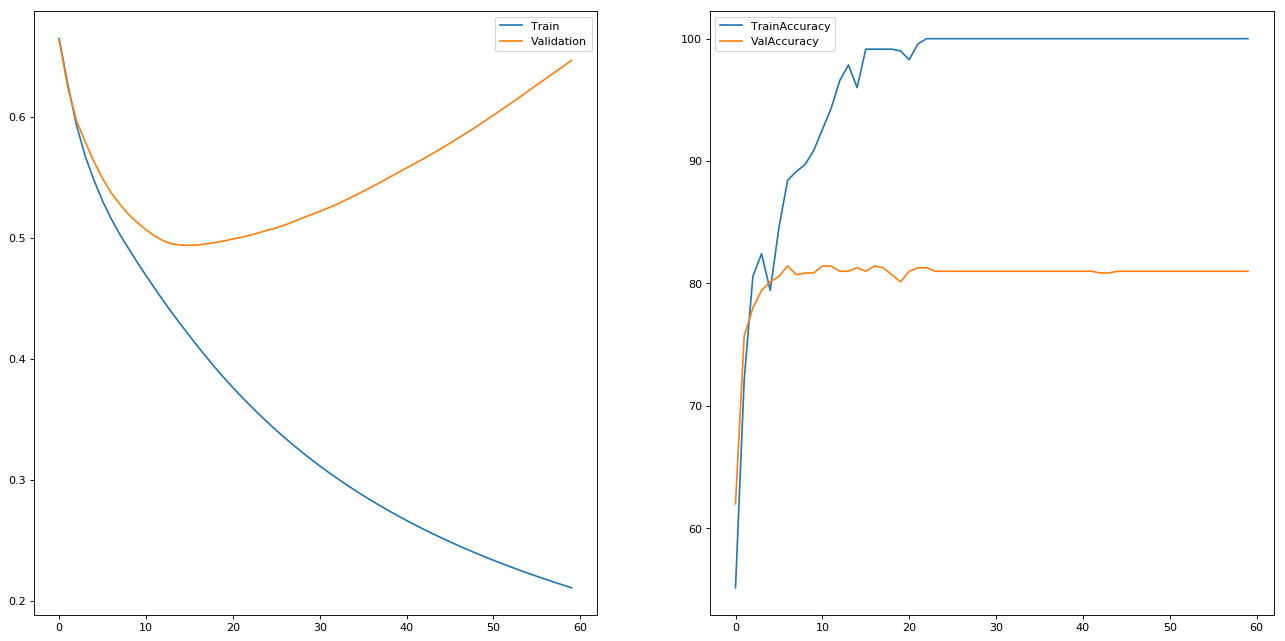

In [11]:
###############################################################################################
# ALEXNET SENSE PREENTRENAMENT I SENSE DATA AUGMENTATION                                      #
###############################################################################################

timea = datetime.datetime.now()
best=""
Best=False
do_learn = True
pretrained=False
tipoMD="Alexnet"
ampliacion=False
lr = 0.00001
weight_decay = 0
num_epochs = 60
batch_size = 16 
if __name__ == '__main__':
   main()
   print(pd.DataFrame(besthistory)) 
   print("Tiempo de ejecución: ",datetime.datetime.now()-timea)

Train Epoch: 0 [0/2990 (0%)]	Loss: 0.693214	ValLoss: 0.693232	TrainAccuracy: 50.000000	ValAccuracy: 50.000000
Train Epoch: 0 [480/2990 (16%)]	Loss: 0.693064	ValLoss: 0.693236	TrainAccuracy: 50.000000	ValAccuracy: 50.000000
Train Epoch: 0 [960/2990 (32%)]	Loss: 0.690591	ValLoss: 0.688941	TrainAccuracy: 50.000000	ValAccuracy: 52.000000
Train Epoch: 0 [1440/2990 (48%)]	Loss: 0.681819	ValLoss: 0.683717	TrainAccuracy: 52.000000	ValAccuracy: 57.000000
Train Epoch: 0 [1920/2990 (64%)]	Loss: 0.668033	ValLoss: 0.671778	TrainAccuracy: 54.000000	ValAccuracy: 57.000000
Train Epoch: 0 [2400/2990 (80%)]	Loss: 0.666976	ValLoss: 0.670144	TrainAccuracy: 55.000000	ValAccuracy: 59.000000
Train Epoch: 0 [2880/2990 (96%)]	Loss: 0.651897	ValLoss: 0.663177	TrainAccuracy: 56.000000	ValAccuracy: 61.000000
Test (all test data) accuracy: 1207/1980 (60.000%)


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type AlexNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Train Epoch: 1 [0/2990 (0%)]	Loss: 0.649769	ValLoss: 0.657623	TrainAccuracy: 65.000000	ValAccuracy: 61.000000
Train Epoch: 1 [480/2990 (16%)]	Loss: 0.654728	ValLoss: 0.658819	TrainAccuracy: 63.000000	ValAccuracy: 62.000000
Train Epoch: 1 [960/2990 (32%)]	Loss: 0.647781	ValLoss: 0.662249	TrainAccuracy: 62.000000	ValAccuracy: 62.000000
Train Epoch: 1 [1440/2990 (48%)]	Loss: 0.644610	ValLoss: 0.659775	TrainAccuracy: 63.000000	ValAccuracy: 66.000000
Train Epoch: 1 [1920/2990 (64%)]	Loss: 0.636295	ValLoss: 0.658221	TrainAccuracy: 63.000000	ValAccuracy: 64.000000
Train Epoch: 1 [2400/2990 (80%)]	Loss: 0.630425	ValLoss: 0.655604	TrainAccuracy: 64.000000	ValAccuracy: 64.000000
Train Epoch: 1 [2880/2990 (96%)]	Loss: 0.634117	ValLoss: 0.653131	TrainAccuracy: 64.000000	ValAccuracy: 67.000000
Test (all test data) accuracy: 1306/1980 (65.000%)


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type AlexNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Train Epoch: 2 [0/2990 (0%)]	Loss: 0.629917	ValLoss: 0.652317	TrainAccuracy: 75.000000	ValAccuracy: 65.000000
Train Epoch: 2 [480/2990 (16%)]	Loss: 0.630920	ValLoss: 0.650771	TrainAccuracy: 67.000000	ValAccuracy: 66.000000
Train Epoch: 2 [960/2990 (32%)]	Loss: 0.626357	ValLoss: 0.645157	TrainAccuracy: 68.000000	ValAccuracy: 69.000000
Train Epoch: 2 [1440/2990 (48%)]	Loss: 0.626707	ValLoss: 0.646821	TrainAccuracy: 68.000000	ValAccuracy: 69.000000
Train Epoch: 2 [1920/2990 (64%)]	Loss: 0.620202	ValLoss: 0.648481	TrainAccuracy: 69.000000	ValAccuracy: 69.000000
Train Epoch: 2 [2400/2990 (80%)]	Loss: 0.613198	ValLoss: 0.641639	TrainAccuracy: 69.000000	ValAccuracy: 69.000000
Train Epoch: 2 [2880/2990 (96%)]	Loss: 0.607125	ValLoss: 0.638858	TrainAccuracy: 69.000000	ValAccuracy: 71.000000
Test (all test data) accuracy: 1365/1980 (68.000%)
Train Epoch: 3 [0/2990 (0%)]	Loss: 0.605199	ValLoss: 0.634976	TrainAccuracy: 75.000000	ValAccuracy: 71.000000
Train Epoch: 3 [480/2990 (16%)]	Loss: 0.599524	

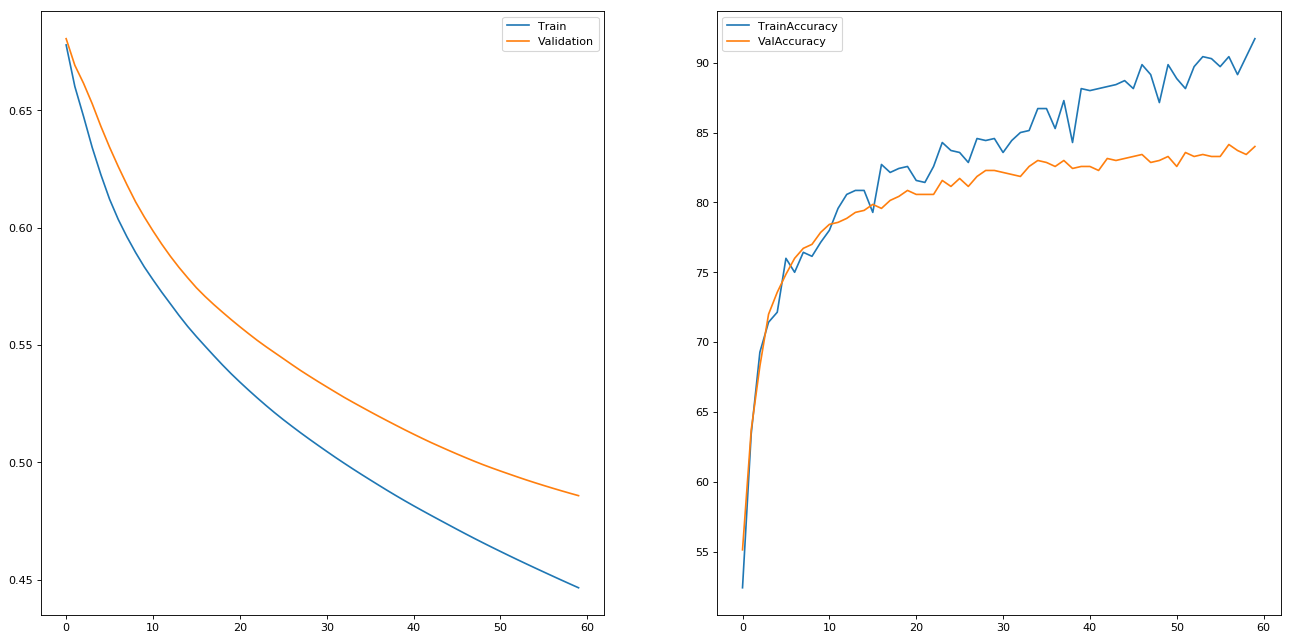

In [23]:
###############################################################################################
# ALEXNET SENSE PREENTRENAMENT I AMB DATA AUGMENTATION                                      #
###############################################################################################

timea=datetime.datetime.now()
best=""
Best=False
do_learn = True
pretrained=False
tipoMD="Alexnet"
ampliacion=True
lr = 0.00001
weight_decay = 0
num_epochs = 60
batch_size = 16  

main()
print(pd.DataFrame(besthistory)) 
print("Tiempo de ejecución: ",datetime.datetime.now()-timea)
   

Train Epoch: 0 [0/2990 (0%)]	Loss: 0.683341	ValLoss: 0.693371	TrainAccuracy: 65.000000	ValAccuracy: 50.000000
Train Epoch: 0 [480/2990 (16%)]	Loss: 0.688163	ValLoss: 0.693378	TrainAccuracy: 49.000000	ValAccuracy: 50.000000
Train Epoch: 0 [960/2990 (32%)]	Loss: 0.689366	ValLoss: 0.692818	TrainAccuracy: 50.000000	ValAccuracy: 49.000000
Train Epoch: 0 [1440/2990 (48%)]	Loss: 0.690154	ValLoss: 0.692574	TrainAccuracy: 49.000000	ValAccuracy: 53.000000
Train Epoch: 0 [1920/2990 (64%)]	Loss: 0.691741	ValLoss: 0.693712	TrainAccuracy: 49.000000	ValAccuracy: 50.000000
Train Epoch: 0 [2400/2990 (80%)]	Loss: 0.691889	ValLoss: 0.693767	TrainAccuracy: 49.000000	ValAccuracy: 49.000000
Train Epoch: 0 [2880/2990 (96%)]	Loss: 0.692044	ValLoss: 0.693808	TrainAccuracy: 49.000000	ValAccuracy: 49.000000
Test (all test data) accuracy: 1018/1980 (51.000%)


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type SiameseDecision. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Train Epoch: 1 [0/2990 (0%)]	Loss: 0.705083	ValLoss: 0.693667	TrainAccuracy: 50.000000	ValAccuracy: 50.000000
Train Epoch: 1 [480/2990 (16%)]	Loss: 0.703883	ValLoss: 0.693574	TrainAccuracy: 51.000000	ValAccuracy: 50.000000
Train Epoch: 1 [960/2990 (32%)]	Loss: 0.702443	ValLoss: 0.693785	TrainAccuracy: 49.000000	ValAccuracy: 49.000000
Train Epoch: 1 [1440/2990 (48%)]	Loss: 0.701721	ValLoss: 0.693704	TrainAccuracy: 49.000000	ValAccuracy: 49.000000
Train Epoch: 1 [1920/2990 (64%)]	Loss: 0.701076	ValLoss: 0.693536	TrainAccuracy: 49.000000	ValAccuracy: 50.000000
Train Epoch: 1 [2400/2990 (80%)]	Loss: 0.700480	ValLoss: 0.693514	TrainAccuracy: 50.000000	ValAccuracy: 48.000000
Train Epoch: 1 [2880/2990 (96%)]	Loss: 0.700046	ValLoss: 0.693052	TrainAccuracy: 50.000000	ValAccuracy: 49.000000
Test (all test data) accuracy: 956/1980 (48.000%)


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type SiameseDecision. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Train Epoch: 2 [0/2990 (0%)]	Loss: 0.724428	ValLoss: 0.694106	TrainAccuracy: 46.000000	ValAccuracy: 50.000000
Train Epoch: 2 [480/2990 (16%)]	Loss: 0.722543	ValLoss: 0.694073	TrainAccuracy: 50.000000	ValAccuracy: 50.000000
Train Epoch: 2 [960/2990 (32%)]	Loss: 0.720716	ValLoss: 0.694404	TrainAccuracy: 51.000000	ValAccuracy: 48.000000
Train Epoch: 2 [1440/2990 (48%)]	Loss: 0.719323	ValLoss: 0.694431	TrainAccuracy: 51.000000	ValAccuracy: 50.000000
Train Epoch: 2 [1920/2990 (64%)]	Loss: 0.717768	ValLoss: 0.694536	TrainAccuracy: 50.000000	ValAccuracy: 49.000000
Train Epoch: 2 [2400/2990 (80%)]	Loss: 0.716906	ValLoss: 0.694667	TrainAccuracy: 50.000000	ValAccuracy: 50.000000
Train Epoch: 2 [2880/2990 (96%)]	Loss: 0.715788	ValLoss: 0.694543	TrainAccuracy: 50.000000	ValAccuracy: 50.000000
Test (all test data) accuracy: 992/1980 (50.000%)
Train Epoch: 3 [0/2990 (0%)]	Loss: 0.754908	ValLoss: 0.706211	TrainAccuracy: 46.000000	ValAccuracy: 50.000000
Train Epoch: 3 [480/2990 (16%)]	Loss: 0.752349	V

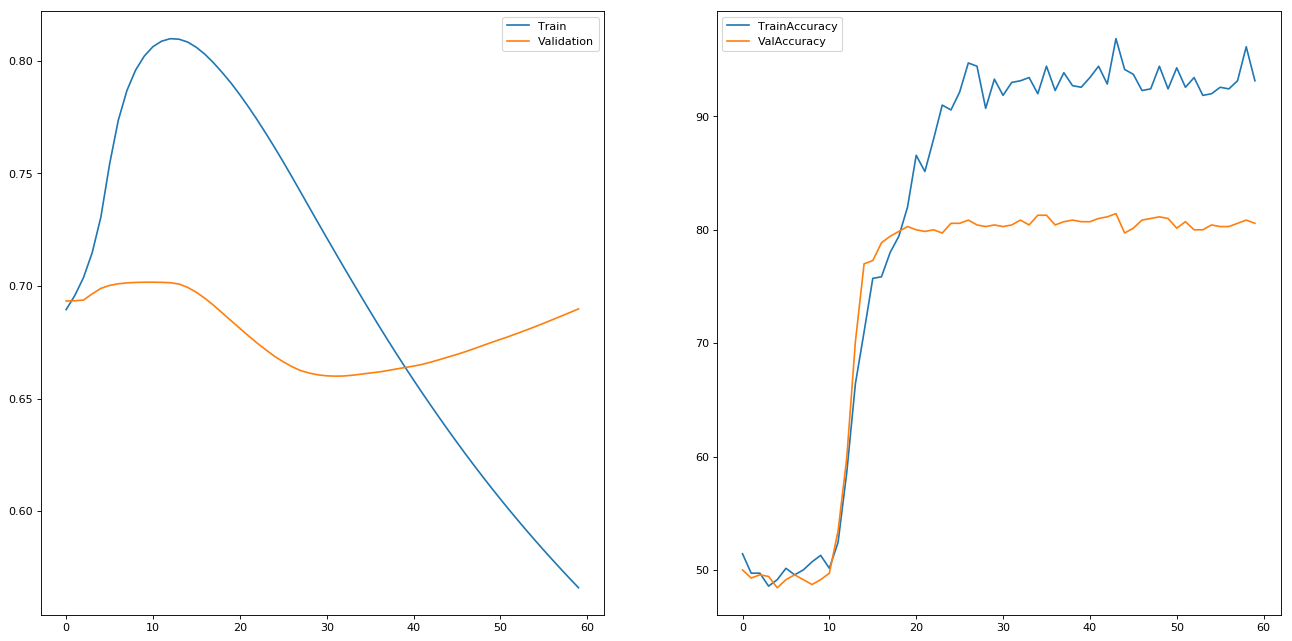

In [11]:
###############################################################################################
# VGG SENSE PREENTRENAMENT I SENSE DATA AUGMENTATION                                          #
###############################################################################################

timea=datetime.datetime.now()
best=""
Best=False
do_learn = True
pretrained=False
tipoMD="VGG"
ampliacion=False
lr = 0.00001
weight_decay = 0
num_epochs = 60
batch_size = 16 

main()
print(pd.DataFrame(besthistory)) 
print("Tiempo de ejecución: ",datetime.datetime.now()-timea)
   

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/checkpoints/vgg16_bn-6c64b313.pth
100%|██████████| 553507836/553507836 [00:38<00:00, 14417681.23it/s]


Train Epoch: 0 [0/2990 (0%)]	Loss: 0.693161	ValLoss: 0.692694	TrainAccuracy: 53.000000	ValAccuracy: 49.000000
Train Epoch: 0 [480/2990 (16%)]	Loss: 0.677268	ValLoss: 0.662201	TrainAccuracy: 57.000000	ValAccuracy: 69.000000
Train Epoch: 0 [960/2990 (32%)]	Loss: 0.639450	ValLoss: 0.609549	TrainAccuracy: 63.000000	ValAccuracy: 71.000000
Train Epoch: 0 [1440/2990 (48%)]	Loss: 0.611433	ValLoss: 0.562644	TrainAccuracy: 65.000000	ValAccuracy: 76.000000
Train Epoch: 0 [1920/2990 (64%)]	Loss: 0.588414	ValLoss: 0.581709	TrainAccuracy: 67.000000	ValAccuracy: 74.000000
Train Epoch: 0 [2400/2990 (80%)]	Loss: 0.579980	ValLoss: 0.565403	TrainAccuracy: 68.000000	ValAccuracy: 78.000000
Train Epoch: 0 [2880/2990 (96%)]	Loss: 0.545924	ValLoss: 0.564345	TrainAccuracy: 70.000000	ValAccuracy: 80.000000
Test (all test data) accuracy: 1554/1980 (78.000%)


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type SiameseDecision. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Train Epoch: 1 [0/2990 (0%)]	Loss: 0.559226	ValLoss: 0.540741	TrainAccuracy: 59.000000	ValAccuracy: 80.000000
Train Epoch: 1 [480/2990 (16%)]	Loss: 0.529756	ValLoss: 0.528980	TrainAccuracy: 82.000000	ValAccuracy: 81.000000
Train Epoch: 1 [960/2990 (32%)]	Loss: 0.521099	ValLoss: 0.516896	TrainAccuracy: 83.000000	ValAccuracy: 80.000000
Train Epoch: 1 [1440/2990 (48%)]	Loss: 0.524902	ValLoss: 0.493522	TrainAccuracy: 83.000000	ValAccuracy: 83.000000
Train Epoch: 1 [1920/2990 (64%)]	Loss: 0.507577	ValLoss: 0.481485	TrainAccuracy: 83.000000	ValAccuracy: 83.000000
Train Epoch: 1 [2400/2990 (80%)]	Loss: 0.492888	ValLoss: 0.465307	TrainAccuracy: 83.000000	ValAccuracy: 83.000000
Train Epoch: 1 [2880/2990 (96%)]	Loss: 0.493905	ValLoss: 0.453190	TrainAccuracy: 83.000000	ValAccuracy: 81.000000
Test (all test data) accuracy: 1583/1980 (79.000%)


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type SiameseDecision. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Train Epoch: 2 [0/2990 (0%)]	Loss: 0.491734	ValLoss: 0.444689	TrainAccuracy: 84.000000	ValAccuracy: 83.000000
Train Epoch: 2 [480/2990 (16%)]	Loss: 0.475054	ValLoss: 0.449068	TrainAccuracy: 89.000000	ValAccuracy: 84.000000
Train Epoch: 2 [960/2990 (32%)]	Loss: 0.455541	ValLoss: 0.442258	TrainAccuracy: 90.000000	ValAccuracy: 84.000000
Train Epoch: 2 [1440/2990 (48%)]	Loss: 0.443432	ValLoss: 0.436603	TrainAccuracy: 90.000000	ValAccuracy: 82.000000
Train Epoch: 2 [1920/2990 (64%)]	Loss: 0.432504	ValLoss: 0.432121	TrainAccuracy: 91.000000	ValAccuracy: 84.000000
Train Epoch: 2 [2400/2990 (80%)]	Loss: 0.427546	ValLoss: 0.428447	TrainAccuracy: 90.000000	ValAccuracy: 84.000000
Train Epoch: 2 [2880/2990 (96%)]	Loss: 0.419010	ValLoss: 0.425604	TrainAccuracy: 90.000000	ValAccuracy: 85.000000
Test (all test data) accuracy: 1630/1980 (82.000%)
Train Epoch: 3 [0/2990 (0%)]	Loss: 0.420275	ValLoss: 0.423879	TrainAccuracy: 81.000000	ValAccuracy: 84.000000
Train Epoch: 3 [480/2990 (16%)]	Loss: 0.404784	

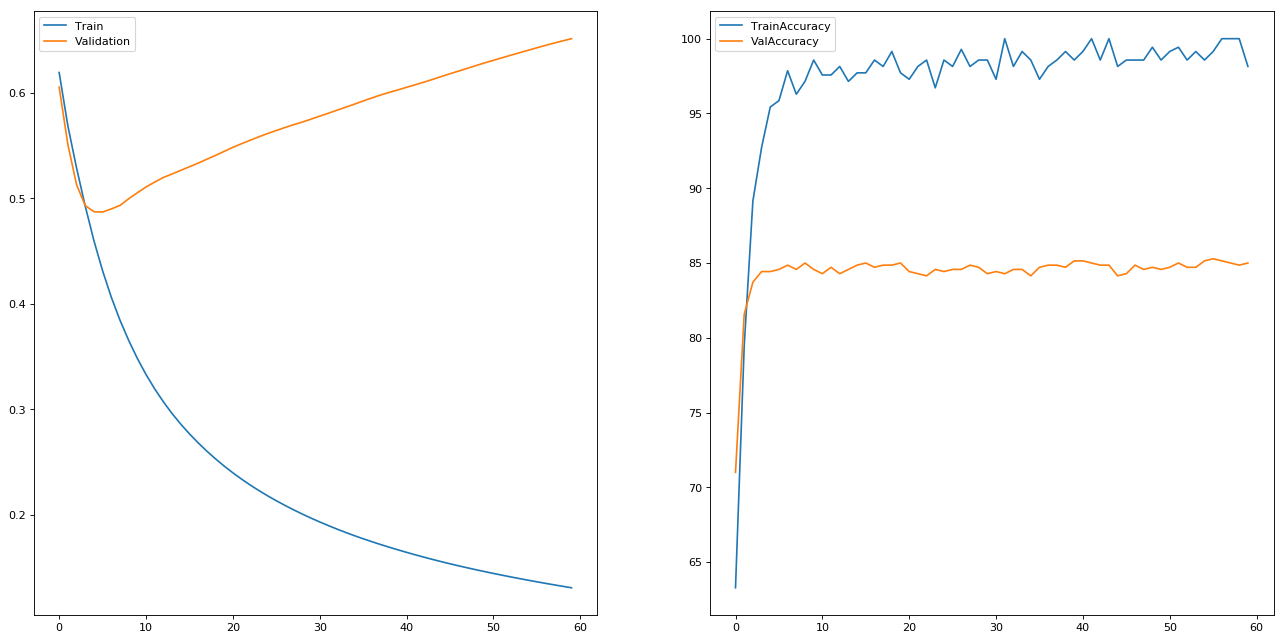

In [11]:
###############################################################################################
# VGG AMB PREENTRENAMENT I SENSE DATA AUGMENTATION                                            #
###############################################################################################

timea=datetime.datetime.now()
best=""
Best=False
do_learn = True
pretrained=True
tipoMD="VGG"
ampliacion=False
lr = 0.00001
weight_decay = 0
num_epochs = 60
batch_size = 16 

main()
print(pd.DataFrame(besthistory)) 
print("Tiempo de ejecución: ",datetime.datetime.now()-timea)
   

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/checkpoints/vgg16_bn-6c64b313.pth
100%|██████████| 553507836/553507836 [00:07<00:00, 75788348.08it/s]


Train Epoch: 0 [0/2990 (0%)]	Loss: 0.681299	ValLoss: 0.693832	TrainAccuracy: 62.000000	ValAccuracy: 49.000000
Train Epoch: 0 [480/2990 (16%)]	Loss: 0.687846	ValLoss: 0.693308	TrainAccuracy: 51.000000	ValAccuracy: 51.000000
Train Epoch: 0 [960/2990 (32%)]	Loss: 0.692588	ValLoss: 0.694329	TrainAccuracy: 52.000000	ValAccuracy: 54.000000
Train Epoch: 0 [1440/2990 (48%)]	Loss: 0.688568	ValLoss: 0.689637	TrainAccuracy: 53.000000	ValAccuracy: 58.000000
Train Epoch: 0 [1920/2990 (64%)]	Loss: 0.678183	ValLoss: 0.676699	TrainAccuracy: 56.000000	ValAccuracy: 69.000000
Train Epoch: 0 [2400/2990 (80%)]	Loss: 0.648188	ValLoss: 0.643280	TrainAccuracy: 58.000000	ValAccuracy: 74.000000
Train Epoch: 0 [2880/2990 (96%)]	Loss: 0.616225	ValLoss: 0.639507	TrainAccuracy: 61.000000	ValAccuracy: 76.000000
Test (all test data) accuracy: 1533/1980 (77.000%)


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type SiameseDecision. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Train Epoch: 1 [0/2990 (0%)]	Loss: 0.620540	ValLoss: 0.608763	TrainAccuracy: 62.000000	ValAccuracy: 78.000000
Train Epoch: 1 [480/2990 (16%)]	Loss: 0.593740	ValLoss: 0.586311	TrainAccuracy: 78.000000	ValAccuracy: 78.000000
Train Epoch: 1 [960/2990 (32%)]	Loss: 0.582154	ValLoss: 0.573138	TrainAccuracy: 78.000000	ValAccuracy: 80.000000
Train Epoch: 1 [1440/2990 (48%)]	Loss: 0.570168	ValLoss: 0.542123	TrainAccuracy: 79.000000	ValAccuracy: 80.000000
Train Epoch: 1 [1920/2990 (64%)]	Loss: 0.559076	ValLoss: 0.537051	TrainAccuracy: 79.000000	ValAccuracy: 80.000000
Train Epoch: 1 [2400/2990 (80%)]	Loss: 0.537834	ValLoss: 0.518080	TrainAccuracy: 80.000000	ValAccuracy: 83.000000
Train Epoch: 1 [2880/2990 (96%)]	Loss: 0.528126	ValLoss: 0.505166	TrainAccuracy: 80.000000	ValAccuracy: 83.000000
Test (all test data) accuracy: 1591/1980 (80.000%)


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type SiameseDecision. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Train Epoch: 2 [0/2990 (0%)]	Loss: 0.526858	ValLoss: 0.495180	TrainAccuracy: 78.000000	ValAccuracy: 82.000000
Train Epoch: 2 [480/2990 (16%)]	Loss: 0.516270	ValLoss: 0.491360	TrainAccuracy: 83.000000	ValAccuracy: 82.000000
Train Epoch: 2 [960/2990 (32%)]	Loss: 0.497041	ValLoss: 0.486906	TrainAccuracy: 84.000000	ValAccuracy: 82.000000
Train Epoch: 2 [1440/2990 (48%)]	Loss: 0.490790	ValLoss: 0.483451	TrainAccuracy: 84.000000	ValAccuracy: 81.000000
Train Epoch: 2 [1920/2990 (64%)]	Loss: 0.478250	ValLoss: 0.471115	TrainAccuracy: 85.000000	ValAccuracy: 84.000000
Train Epoch: 2 [2400/2990 (80%)]	Loss: 0.470489	ValLoss: 0.466791	TrainAccuracy: 84.000000	ValAccuracy: 83.000000
Train Epoch: 2 [2880/2990 (96%)]	Loss: 0.466517	ValLoss: 0.463591	TrainAccuracy: 84.000000	ValAccuracy: 84.000000
Test (all test data) accuracy: 1632/1980 (82.000%)
Train Epoch: 3 [0/2990 (0%)]	Loss: 0.467768	ValLoss: 0.457814	TrainAccuracy: 78.000000	ValAccuracy: 84.000000
Train Epoch: 3 [480/2990 (16%)]	Loss: 0.455080	

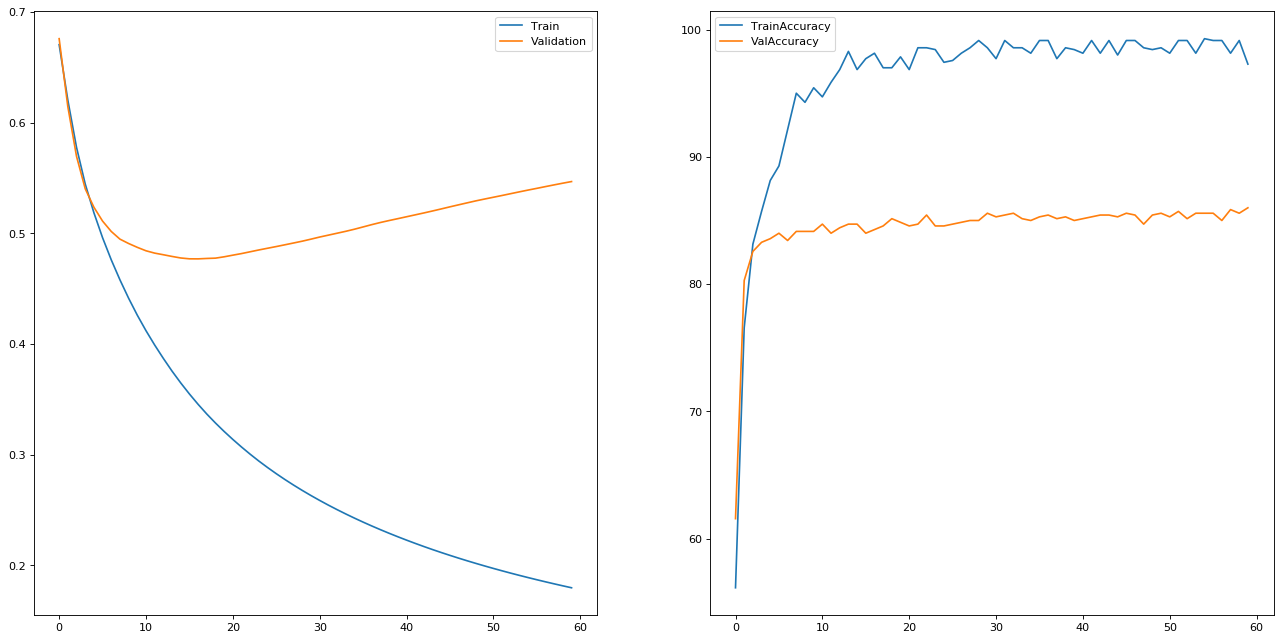

In [10]:
###############################################################################################
# VGG AMB PREENTRENAMENT I AMB DATA AUGMENTATION                                              #
###############################################################################################

timea=datetime.datetime.now()
do_learn = True
pretrained=True
tipoMD="VGG"
ampliacion=True
lr = 0.00001
weight_decay = 0
num_epochs = 60
batch_size = 16 

main()
print(pd.DataFrame(besthistory)) 
print("Tiempo de ejecución: ",datetime.datetime.now()-timea)
   

# MILLOR MODEL: ALEXNET AMB DATA AUGMENTATION 

Train Epoch: 0 [0/2990 (0%)]	Loss: 0.693111	ValLoss: 0.692645	TrainAccuracy: 50.000000	ValAccuracy: 50.000000
Train Epoch: 0 [480/2990 (16%)]	Loss: 0.681852	ValLoss: 0.700165	TrainAccuracy: 52.000000	ValAccuracy: 59.000000
Train Epoch: 0 [960/2990 (32%)]	Loss: 0.676499	ValLoss: 0.699313	TrainAccuracy: 54.000000	ValAccuracy: 57.000000
Train Epoch: 0 [1440/2990 (48%)]	Loss: 0.677476	ValLoss: 0.691320	TrainAccuracy: 55.000000	ValAccuracy: 57.000000
Train Epoch: 0 [1920/2990 (64%)]	Loss: 0.674395	ValLoss: 0.689128	TrainAccuracy: 56.000000	ValAccuracy: 58.000000
Train Epoch: 0 [2400/2990 (80%)]	Loss: 0.674430	ValLoss: 0.679294	TrainAccuracy: 56.000000	ValAccuracy: 61.000000
Train Epoch: 0 [2880/2990 (96%)]	Loss: 0.677145	ValLoss: 0.677803	TrainAccuracy: 56.000000	ValAccuracy: 60.000000
Test (all test data) accuracy: 1202/1980 (60.000%)


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type AlexNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Train Epoch: 1 [0/2990 (0%)]	Loss: 0.678824	ValLoss: 0.675372	TrainAccuracy: 43.000000	ValAccuracy: 60.000000
Train Epoch: 1 [480/2990 (16%)]	Loss: 0.675800	ValLoss: 0.672599	TrainAccuracy: 59.000000	ValAccuracy: 59.000000
Train Epoch: 1 [960/2990 (32%)]	Loss: 0.672237	ValLoss: 0.674598	TrainAccuracy: 60.000000	ValAccuracy: 58.000000
Train Epoch: 1 [1440/2990 (48%)]	Loss: 0.669377	ValLoss: 0.672608	TrainAccuracy: 60.000000	ValAccuracy: 61.000000
Train Epoch: 1 [1920/2990 (64%)]	Loss: 0.669895	ValLoss: 0.673520	TrainAccuracy: 59.000000	ValAccuracy: 57.000000
Train Epoch: 1 [2400/2990 (80%)]	Loss: 0.668148	ValLoss: 0.673120	TrainAccuracy: 59.000000	ValAccuracy: 58.000000
Train Epoch: 1 [2880/2990 (96%)]	Loss: 0.668608	ValLoss: 0.670377	TrainAccuracy: 59.000000	ValAccuracy: 60.000000
Test (all test data) accuracy: 1229/1980 (62.000%)


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type AlexNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Train Epoch: 2 [0/2990 (0%)]	Loss: 0.669530	ValLoss: 0.666278	TrainAccuracy: 43.000000	ValAccuracy: 60.000000
Train Epoch: 2 [480/2990 (16%)]	Loss: 0.669724	ValLoss: 0.667175	TrainAccuracy: 60.000000	ValAccuracy: 58.000000
Train Epoch: 2 [960/2990 (32%)]	Loss: 0.666724	ValLoss: 0.668931	TrainAccuracy: 60.000000	ValAccuracy: 60.000000
Train Epoch: 2 [1440/2990 (48%)]	Loss: 0.670497	ValLoss: 0.667450	TrainAccuracy: 61.000000	ValAccuracy: 62.000000
Train Epoch: 2 [1920/2990 (64%)]	Loss: 0.670847	ValLoss: 0.667524	TrainAccuracy: 61.000000	ValAccuracy: 60.000000
Train Epoch: 2 [2400/2990 (80%)]	Loss: 0.670238	ValLoss: 0.658562	TrainAccuracy: 61.000000	ValAccuracy: 62.000000
Train Epoch: 2 [2880/2990 (96%)]	Loss: 0.669616	ValLoss: 0.658809	TrainAccuracy: 60.000000	ValAccuracy: 60.000000
Test (all test data) accuracy: 1155/1980 (58.000%)
Train Epoch: 3 [0/2990 (0%)]	Loss: 0.669338	ValLoss: 0.656941	TrainAccuracy: 62.000000	ValAccuracy: 57.000000
Train Epoch: 3 [480/2990 (16%)]	Loss: 0.669932	

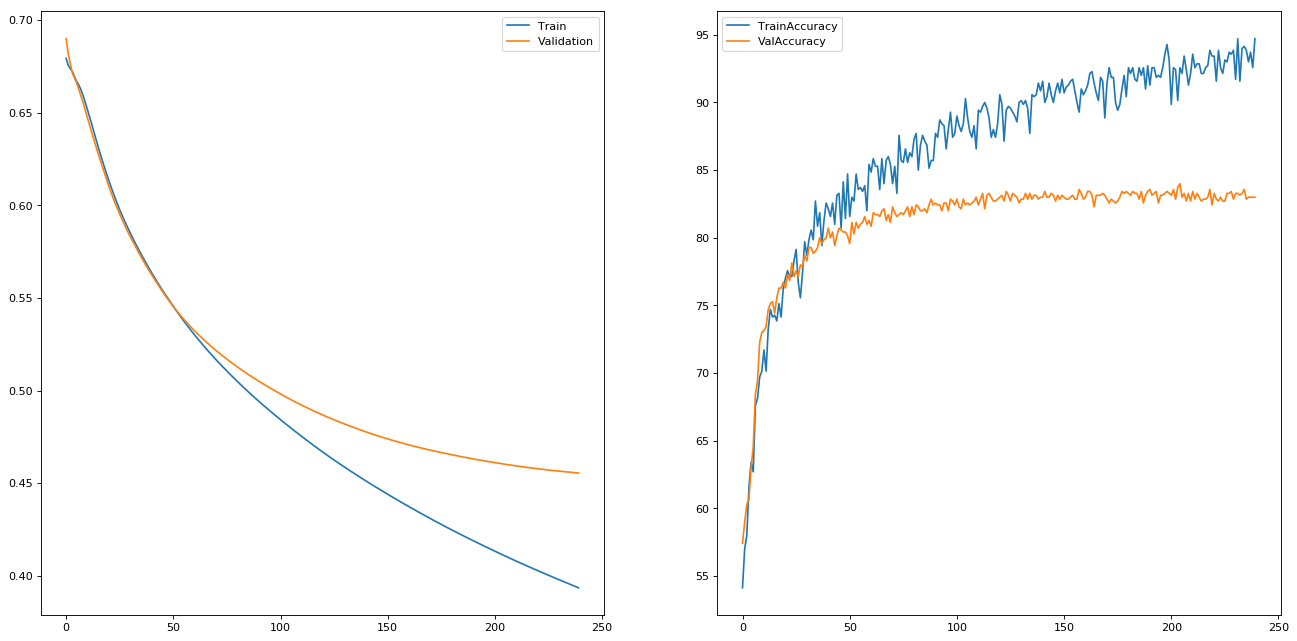

In [12]:
###############################################################################################
# ALEXNET SENSE PREENTRENAMENT I AMB DATA AUGMENTATION     LR:5E-4                            #
###############################################################################################

timea=datetime.datetime.now()
best=""
Best=False
do_learn = True
pretrained=False
tipoMD="Alexnet"
ampliacion=True
lr = 0.0005
weight_decay = 0
num_epochs = 240
batch_size = 16  

main()
print(pd.DataFrame(besthistory)) 
print("Tiempo de ejecución: ",datetime.datetime.now()-timea)

Train Epoch: 0 [0/2990 (0%)]	Loss: 0.693543	ValLoss: 0.693060	TrainAccuracy: 40.000000	ValAccuracy: 50.000000
Train Epoch: 0 [480/2990 (16%)]	Loss: 0.693146	ValLoss: 0.693596	TrainAccuracy: 49.000000	ValAccuracy: 50.000000
Train Epoch: 0 [960/2990 (32%)]	Loss: 0.693221	ValLoss: 0.693455	TrainAccuracy: 49.000000	ValAccuracy: 50.000000
Train Epoch: 0 [1440/2990 (48%)]	Loss: 0.693203	ValLoss: 0.693377	TrainAccuracy: 50.000000	ValAccuracy: 50.000000
Train Epoch: 0 [1920/2990 (64%)]	Loss: 0.693189	ValLoss: 0.693331	TrainAccuracy: 50.000000	ValAccuracy: 48.000000
Train Epoch: 0 [2400/2990 (80%)]	Loss: 0.693188	ValLoss: 0.693298	TrainAccuracy: 49.000000	ValAccuracy: 50.000000
Train Epoch: 0 [2880/2990 (96%)]	Loss: 0.693129	ValLoss: 0.693359	TrainAccuracy: 49.000000	ValAccuracy: 51.000000
Test (all test data) accuracy: 990/1980 (50.000%)


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type AlexnetDecision. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Train Epoch: 1 [0/2990 (0%)]	Loss: 0.693078	ValLoss: 0.693329	TrainAccuracy: 46.000000	ValAccuracy: 50.000000
Train Epoch: 1 [480/2990 (16%)]	Loss: 0.693047	ValLoss: 0.693309	TrainAccuracy: 49.000000	ValAccuracy: 50.000000
Train Epoch: 1 [960/2990 (32%)]	Loss: 0.693058	ValLoss: 0.693294	TrainAccuracy: 49.000000	ValAccuracy: 50.000000
Train Epoch: 1 [1440/2990 (48%)]	Loss: 0.693073	ValLoss: 0.693273	TrainAccuracy: 50.000000	ValAccuracy: 50.000000
Train Epoch: 1 [1920/2990 (64%)]	Loss: 0.693081	ValLoss: 0.693267	TrainAccuracy: 50.000000	ValAccuracy: 50.000000
Train Epoch: 1 [2400/2990 (80%)]	Loss: 0.693059	ValLoss: 0.693291	TrainAccuracy: 50.000000	ValAccuracy: 48.000000
Train Epoch: 1 [2880/2990 (96%)]	Loss: 0.693065	ValLoss: 0.693282	TrainAccuracy: 49.000000	ValAccuracy: 50.000000
Test (all test data) accuracy: 977/1980 (49.000%)


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type AlexnetDecision. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Train Epoch: 2 [0/2990 (0%)]	Loss: 0.693079	ValLoss: 0.693275	TrainAccuracy: 56.000000	ValAccuracy: 50.000000
Train Epoch: 2 [480/2990 (16%)]	Loss: 0.693082	ValLoss: 0.693268	TrainAccuracy: 50.000000	ValAccuracy: 49.000000
Train Epoch: 2 [960/2990 (32%)]	Loss: 0.693096	ValLoss: 0.693243	TrainAccuracy: 49.000000	ValAccuracy: 51.000000
Train Epoch: 2 [1440/2990 (48%)]	Loss: 0.693099	ValLoss: 0.693238	TrainAccuracy: 49.000000	ValAccuracy: 51.000000
Train Epoch: 2 [1920/2990 (64%)]	Loss: 0.693100	ValLoss: 0.693234	TrainAccuracy: 49.000000	ValAccuracy: 50.000000
Train Epoch: 2 [2400/2990 (80%)]	Loss: 0.693103	ValLoss: 0.693230	TrainAccuracy: 49.000000	ValAccuracy: 49.000000
Train Epoch: 2 [2880/2990 (96%)]	Loss: 0.693105	ValLoss: 0.693226	TrainAccuracy: 49.000000	ValAccuracy: 50.000000
Test (all test data) accuracy: 990/1980 (50.000%)
Train Epoch: 3 [0/2990 (0%)]	Loss: 0.693179	ValLoss: 0.693220	TrainAccuracy: 43.000000	ValAccuracy: 50.000000
Train Epoch: 3 [480/2990 (16%)]	Loss: 0.693175	V

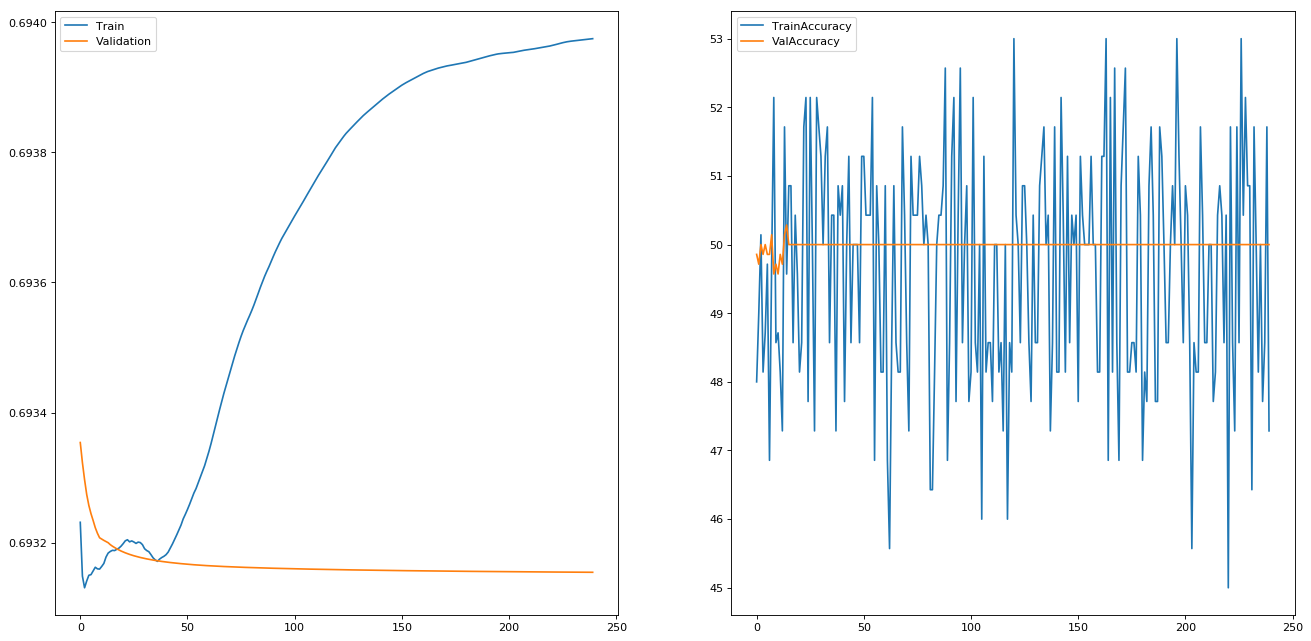

In [12]:
###############################################################################################
# ALEXNET AMB PREENTRENAMENT I AMB DATA AUGMENTATION      5E-4                                #
###############################################################################################

timea=datetime.datetime.now()
best=""
Best=False
do_learn = True
pretrained=True
tipoMD="Alexnet"
ampliacion=True
lr = 0.0005
weight_decay = 0
num_epochs = 240
batch_size = 16  

main()
print(pd.DataFrame(besthistory)) 
print("Tiempo de ejecución: ",datetime.datetime.now()-timea)



Train Epoch: 0 [0/2990 (0%)]	Loss: 0.694474	ValLoss: 0.693222	TrainAccuracy: 50.000000	ValAccuracy: 50.000000
Train Epoch: 0 [480/2990 (16%)]	Loss: 0.694473	ValLoss: 0.693222	TrainAccuracy: 49.000000	ValAccuracy: 50.000000
Train Epoch: 0 [960/2990 (32%)]	Loss: 0.694472	ValLoss: 0.693222	TrainAccuracy: 49.000000	ValAccuracy: 50.000000
Train Epoch: 0 [1440/2990 (48%)]	Loss: 0.694471	ValLoss: 0.693222	TrainAccuracy: 49.000000	ValAccuracy: 50.000000
Train Epoch: 0 [1920/2990 (64%)]	Loss: 0.694470	ValLoss: 0.693221	TrainAccuracy: 49.000000	ValAccuracy: 50.000000
Train Epoch: 0 [2400/2990 (80%)]	Loss: 0.694470	ValLoss: 0.693221	TrainAccuracy: 49.000000	ValAccuracy: 50.000000
Train Epoch: 0 [2880/2990 (96%)]	Loss: 0.694469	ValLoss: 0.693221	TrainAccuracy: 49.000000	ValAccuracy: 50.000000
Test (all test data) accuracy: 990/1980 (50.000%)
Train Epoch: 1 [0/2990 (0%)]	Loss: 0.694468	ValLoss: 0.693221	TrainAccuracy: 56.000000	ValAccuracy: 50.000000
Train Epoch: 1 [480/2990 (16%)]	Loss: 0.694467	V

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type AlexnetDecision. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


     0        1       2  3         4         5     6     7
0    1  Alexnet  0.0005  0  0.693239  0.693025  50.0  50.0
1    2  Alexnet  0.0005  0  0.693045  0.693054  50.0  50.0
2    3  Alexnet  0.0005  0  0.693086  0.693080  49.0  50.0
3    4  Alexnet  0.0005  0  0.693076  0.693165  50.0  49.0
4    5  Alexnet  0.0005  0  0.693088  0.693125  50.0  50.0
5    6  Alexnet  0.0005  0  0.693096  0.693124  50.0  49.0
6    7  Alexnet  0.0005  0  0.693103  0.693152  50.0  50.0
7    8  Alexnet  0.0005  0  0.693108  0.693159  50.0  50.0
8    9  Alexnet  0.0005  0  0.693112  0.693002  49.0  50.0
9   10  Alexnet  0.0005  0  0.693115  0.693024  50.0  50.0
10  11  Alexnet  0.0005  0  0.693118  0.692831  50.0  50.0
11  12  Alexnet  0.0005  0  0.693121  0.692578  50.0  50.0
12  13  Alexnet  0.0005  0  0.693123  0.692475  50.0  50.0
13  14  Alexnet  0.0005  0  0.693126  0.692373  50.0  50.0
14  15  Alexnet  0.0005  0  0.693127  0.692591  50.0  50.0
15  16  Alexnet  0.0005  0  0.693129  0.693074  50.0  49

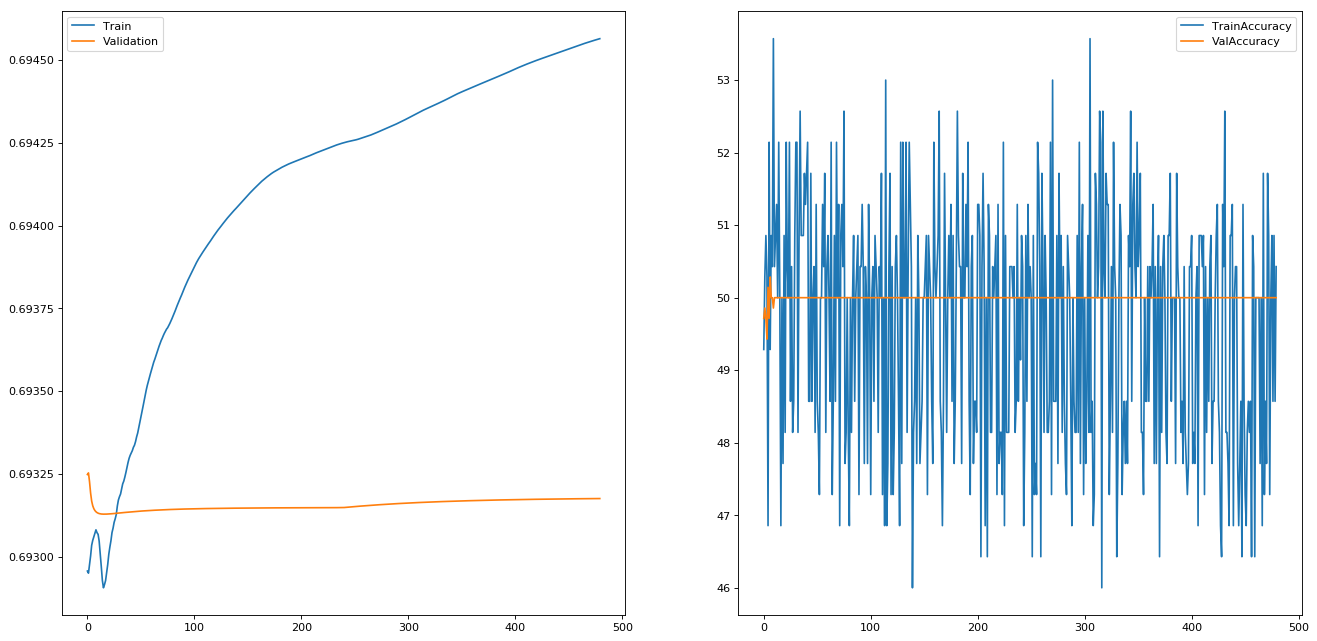

In [12]:
###############################################################################################
# ALEXNET AMB PREENTRENAMENT I AMB DATA AUGMENTATION    1E-3                                  #
###############################################################################################

timea=datetime.datetime.now()
best=""
Best=False
do_learn = True
pretrained=True
tipoMD="Alexnet"
ampliacion=True
lr = 0.001
weight_decay = 0
num_epochs = 240
batch_size = 16  

main()
print(pd.DataFrame(besthistory)) 
print("Tiempo de ejecución: ",datetime.datetime.now()-timea)

In [0]:
###############################################################################################
# ALEXNET AMB PREENTRENAMENT I AMB DATA AUGMENTATION    1E-5                                #
###############################################################################################

timea=datetime.datetime.now()
best=""
Best=False
do_learn = True
pretrained=False
tipoMD="Alexnet"
ampliacion=True
lr = 0.00001
weight_decay = 0
num_epochs = 240
batch_size = 16  

main()
print(pd.DataFrame(besthistory)) 
print("Tiempo de ejecución: ",datetime.datetime.now()-timea)

Train Epoch: 0 [0/2990 (0%)]	Loss: 0.695014	ValLoss: 0.693189	TrainAccuracy: 50.000000	ValAccuracy: 50.000000
Train Epoch: 0 [480/2990 (16%)]	Loss: 0.695013	ValLoss: 0.693188	TrainAccuracy: 51.000000	ValAccuracy: 50.000000
Train Epoch: 0 [960/2990 (32%)]	Loss: 0.695010	ValLoss: 0.693187	TrainAccuracy: 51.000000	ValAccuracy: 51.000000
Train Epoch: 0 [1440/2990 (48%)]	Loss: 0.695002	ValLoss: 0.693186	TrainAccuracy: 52.000000	ValAccuracy: 56.000000
Train Epoch: 0 [1920/2990 (64%)]	Loss: 0.694985	ValLoss: 0.693165	TrainAccuracy: 54.000000	ValAccuracy: 59.000000
Train Epoch: 0 [2400/2990 (80%)]	Loss: 0.694972	ValLoss: 0.693166	TrainAccuracy: 55.000000	ValAccuracy: 59.000000
Train Epoch: 0 [2880/2990 (96%)]	Loss: 0.694973	ValLoss: 0.693166	TrainAccuracy: 56.000000	ValAccuracy: 60.000000
Test (all test data) accuracy: 1165/1980 (58.000%)
Train Epoch: 1 [0/2990 (0%)]	Loss: 0.694966	ValLoss: 0.693157	TrainAccuracy: 50.000000	ValAccuracy: 58.000000
Train Epoch: 1 [480/2990 (16%)]	Loss: 0.694943	

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type AlexNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Train Epoch: 2 [0/2990 (0%)]	Loss: 0.694733	ValLoss: 0.693042	TrainAccuracy: 81.000000	ValAccuracy: 65.000000
Train Epoch: 2 [480/2990 (16%)]	Loss: 0.694710	ValLoss: 0.693027	TrainAccuracy: 67.000000	ValAccuracy: 64.000000
Train Epoch: 2 [960/2990 (32%)]	Loss: 0.694652	ValLoss: 0.693021	TrainAccuracy: 67.000000	ValAccuracy: 65.000000
Train Epoch: 2 [1440/2990 (48%)]	Loss: 0.694653	ValLoss: 0.692980	TrainAccuracy: 67.000000	ValAccuracy: 66.000000
Train Epoch: 2 [1920/2990 (64%)]	Loss: 0.694660	ValLoss: 0.692951	TrainAccuracy: 67.000000	ValAccuracy: 67.000000
Train Epoch: 2 [2400/2990 (80%)]	Loss: 0.694626	ValLoss: 0.692910	TrainAccuracy: 67.000000	ValAccuracy: 67.000000
Train Epoch: 2 [2880/2990 (96%)]	Loss: 0.694606	ValLoss: 0.692885	TrainAccuracy: 67.000000	ValAccuracy: 68.000000
Test (all test data) accuracy: 1260/1980 (63.000%)
Train Epoch: 3 [0/2990 (0%)]	Loss: 0.694565	ValLoss: 0.692878	TrainAccuracy: 71.000000	ValAccuracy: 68.000000
Train Epoch: 3 [480/2990 (16%)]	Loss: 0.694530	

# TEST0: ALEXNET SENSE PREENTRENAMENT I AMB DATA AUGMENTATION LR5E-4

Test (all test data) accuracy: 1636/1980 (82.000%)


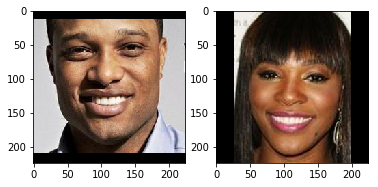

NOT of the same person


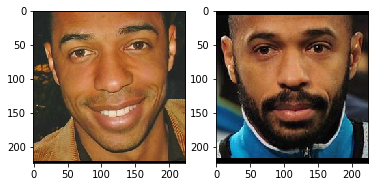

The same person
Tiempo de ejecución:  0:00:08.228100


In [21]:
###############################################################################################
# ALEXNET SENSE PREENTRENAMENT I AMB DATA AUGMENTATION   EPOCH OPTIM 95      LR 5E-4          #
###############################################################################################

timea=datetime.datetime.now()
rutaWeightsColab="gdrive/My Drive/Colab Notebooks/weights/"
pretrained=False
tipoMD="Alexnet"
ampliacion=True
lr = 0.0005
weight_decay = 0
batch_size = 16 
InferenceAccuracyShow=True
do_learn = False
epoch=weightNum=239
batch_size = 16
main()
print("Tiempo de ejecución: ",datetime.datetime.now()-timea)

# Test1: VGG AMB PREENTRENAMENT I AMB DATA AUGMENTATION

Test (all test data) accuracy: 1691/1980 (85.000%)


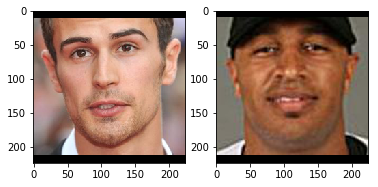

NOT of the same person


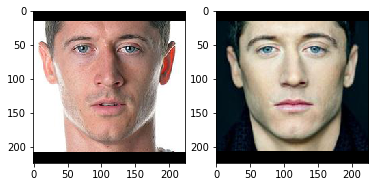

The same person
Tiempo de ejecución:  0:00:43.973151


In [14]:
###############################################################################################
# VGG AMB PREENTRENAMENT I AMB DATA AUGMENTATION   EPOCH OPTIM 16                             #
###############################################################################################

timea=datetime.datetime.now()
rutaWeightsColab="gdrive/My Drive/Colab Notebooks/weights/VGG AMP1_PRETR1/"
pretrained=True
tipoMD="VGG"
ampliacion=True
lr = 0.00001
weight_decay = 0
batch_size = 16 
InferenceAccuracyShow=True
do_learn = False
epoch=weightNum=16
batch_size = 16
main()
print("Tiempo de ejecución: ",datetime.datetime.now()-timea)

# Test2: VGG AMB PREENTRENAMENT I SENSE DATA AUGMENTATION

Test (all test data) accuracy: 1659/1980 (83.000%)


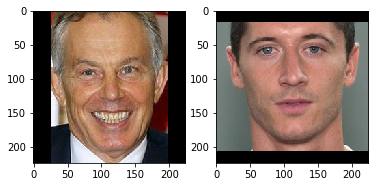

NOT of the same person


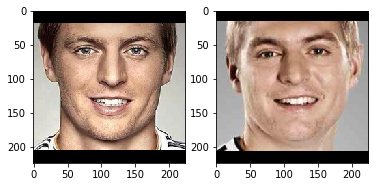

The same person
Tiempo de ejecución:  0:00:49.216379


In [15]:
###############################################################################################
# VGG AMB PREENTRENAMENT I SENSE DATA AUGMENTATION   EPOCH OPTIM 5                            #
###############################################################################################

timea=datetime.datetime.now()
rutaWeightsColab="gdrive/My Drive/Colab Notebooks/weights/VGG AMP0_PRETR1/"
pretrained=True
tipoMD="VGG"
ampliacion=False
lr = 0.00001
weight_decay = 0
batch_size = 16 
InferenceAccuracyShow=True
do_learn = False
epoch=weightNum=5
batch_size = 16
main()
print("Tiempo de ejecución: ",datetime.datetime.now()-timea)

# Test3: VGG SENSE PREENTRENAMENT I SENSE DATA AUGMENTATION

Test (all test data) accuracy: 1432/1980 (72.000%)


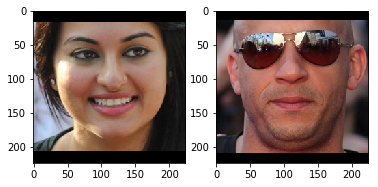

The same person


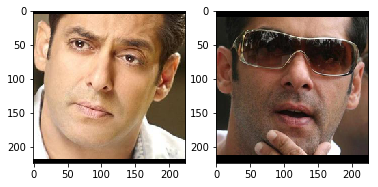

The same person
Tiempo de ejecución:  0:00:53.731166


In [17]:
###############################################################################################
# VGG SENSE PREENTRENAMENT I SENSE DATA AUGMENTATION   EPOCH OPTIM 15                         #
###############################################################################################

timea=datetime.datetime.now()
rutaWeightsColab="gdrive/My Drive/Colab Notebooks/weights/VGG AMP0_PRETR0/"
pretrained=False
tipoMD="VGG"
ampliacion=False
lr = 0.00001
weight_decay = 0
batch_size = 16 
InferenceAccuracyShow=True
do_learn = False
epoch=weightNum=15
batch_size = 16
main()
print("Tiempo de ejecución: ",datetime.datetime.now()-timea)

# Test4: ALEXNET SENSE PREENTRENAMENT I AMB DATA AUGMENTATION

Test (all test data) accuracy: 1639/1980 (82.000%)


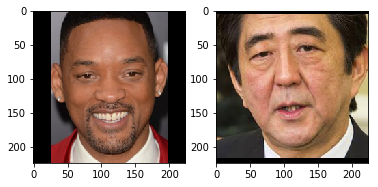

NOT of the same person


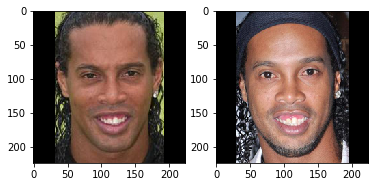

The same person
Tiempo de ejecución:  0:00:12.271413


In [18]:
###############################################################################################
# ALEXNET SENSE PREENTRENAMENT I AMB DATA AUGMENTATION   EPOCH OPTIM 59                       #
###############################################################################################

timea=datetime.datetime.now()
rutaWeightsColab="gdrive/My Drive/Colab Notebooks/weights/ALEXNET AMP1_PRETR0/"
pretrained=False
tipoMD="Alexnet"
ampliacion=True
lr = 0.00001
weight_decay = 0
batch_size = 16 
InferenceAccuracyShow=True
do_learn = False
epoch=weightNum=59
batch_size = 16
main()
print("Tiempo de ejecución: ",datetime.datetime.now()-timea)

# Test5: ALEXNET SENSE PREENTRENAMENT I SENSE DATA AUGMENTATION

Test (all test data) accuracy: 1602/1980 (80.000%)


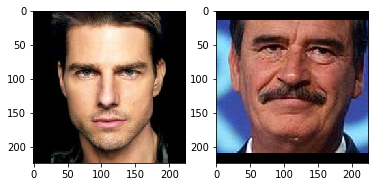

NOT of the same person


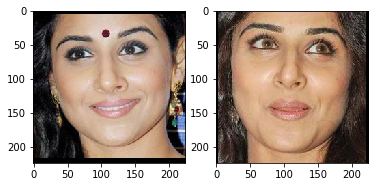

The same person
Tiempo de ejecución:  0:00:08.165782


In [20]:
###############################################################################################
# ALEXNET SENSE PREENTRENAMENT I SENSE DATA AUGMENTATION   EPOCH OPTIM 15                     #
###############################################################################################

timea=datetime.datetime.now()
rutaWeightsColab="gdrive/My Drive/Colab Notebooks/weights/ALEXNET AMP0_PRETR0/"
pretrained=False
tipoMD="Alexnet"
ampliacion=False
lr = 0.00001
weight_decay = 0
batch_size = 16 
InferenceAccuracyShow=True
do_learn = False
epoch=weightNum=15
batch_size = 16
main()
print("Tiempo de ejecución: ",datetime.datetime.now()-timea)

# Test6: REAL TIME

In [0]:
from PIL import Image 
train_datai=[]
filesl= ["Arturo.jpg","photo.jpg"]
for jj in range(0,2): 
  filei=filesl[jj]
  if EstoyEnColab==0:
      im = Image.open('%sArturo/%s'%(rutaData,filei) ).convert(RGBmode) 
  else:
      im = Image.open('%sArturo/%s'%(rutaDataColab,filei)).convert(RGBmode)
  width, height = im.size 
  if width>=height:
      wpercent = (basewidth/float(im.size[0]))
      hsize = int((float(im.size[1])*float(wpercent)))
      im = im.resize((basewidth,hsize), Image.ANTIALIAS)
      im.save('_0.png') 
      width, height =im.size
      if (baseheight-height)%2==0:
          borderType=cv2.BORDER_CONSTANT
          image = cv2.copyMakeBorder(  cv2.imread('_0.png'),  int((baseheight-height)/2) , int((baseheight-height)/2), 0, 0, borderType)
          im = Image.fromarray(image)  
      else:
          borderType=cv2.BORDER_CONSTANT
          image = cv2.copyMakeBorder(  cv2.imread('_0.png'),  int((baseheight-height)/2-0.5) , int((baseheight-height)/2+0.5), 0, 0, cv2.BORDER_CONSTANT,value=[0, 0, 0])
          im = Image.fromarray(image) 
  else:
      wpercent = (baseheight/float(im.size[1]))
      vsize = int((float(im.size[0])*float(wpercent)))
      im = im.resize((vsize,basewidth), Image.ANTIALIAS)
      im.save('_0.png') 
      width, height =im.size
      if (basewidth-width)%2==0:
          borderType=cv2.BORDER_CONSTANT
          image = cv2.copyMakeBorder(  cv2.imread('_0.png') ,   0, 0, int((basewidth-width)/2) , int((basewidth-width)/2),  cv2.BORDER_CONSTANT, borderType)
          im = Image.fromarray(image) 
      else:
          borderType=cv2.BORDER_CONSTANT
          image = cv2.copyMakeBorder( cv2.imread('_0.png'),  0, 0, int((basewidth-width)/2-0.5) , int((basewidth-width)/2+0.5),  cv2.BORDER_CONSTANT,value=[0, 0, 0])
          im = Image.fromarray(image)

  train_datai.append(image) 
  np.stack(train_datai, axis=0).shape 
  train_datai=np.stack(train_datai, axis=0) 
train_datai.shape  
a=torch.from_numpy(train_datai)
        
def rescale(arr):
  arr_min = arr.min()
  arr_max = arr.max()
  return (arr - arr_min) / (arr_max - arr_min)
def parejas(datas):
  img1=np.array(datas[0][0])  
  arr1 = np.zeros((basewidth,baseheight, 3))
  arr1[:,:,0] = img1[2,:,:]
  arr1[:,:,1] = img1[1,:,:]
  arr1[:,:,2] = img1[0,:,:]      
  arr1 = 255.0 * rescale(arr1)
  img2=np.array(datas[1][0]) 
  arr2 = np.zeros((basewidth,baseheight, 3))
  arr2[:,:,0] = img2[2,:,:]
  arr2[:,:,1] = img2[1,:,:]
  arr2[:,:,2] = img2[0,:,:]      
  arr2 = 255.0 * rescale(arr2) 
  f = plt.figure()
  f.add_subplot(1,2, 1)
  plt.imshow(arr1.astype(int))
  f.add_subplot(1,2, 2)
  plt.imshow(arr2.astype(int))
  plt.show(block=True)
  same = oneshot(model, device, datas)
  if same > 0:
     print('The same person') 
  else:
     print('NOT of the same person')  
#print(torch.from_numpy(image).shape) 
#parejas(torch.from_numpy(np.stack(image,image)) )
#print(image.shape)

In [0]:
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

VIDEO_HTML = """
<video autoplay
 width=800 height=600></video>
<script>
var video = document.querySelector('video')
navigator.mediaDevices.getUserMedia({ video: true })
  .then(stream=> video.srcObject = stream)
  
var data = new Promise(resolve=>{
  video.onclick = ()=>{
    var canvas = document.createElement('canvas')
    var [w,h] = [video.offsetWidth, video.offsetHeight]
    canvas.width = w
    canvas.height = h
    canvas.getContext('2d')
          .drawImage(video, 0, 0, w, h)
    video.srcObject.getVideoTracks()[0].stop()
    video.replaceWith(canvas)
    resolve(canvas.toDataURL('image/jpeg', %f))
  }
})
</script>
"""
def take_photo(filename='%sphoto.jpg'%rutaWeightsColab, quality=0.5):
  display(HTML(VIDEO_HTML % quality))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return len(binary)
take_photo()